In [ ]:
!pip install sweetviz
!pip install dabl

In [1]:
# import required modules
import pandas as pd
import numpy as np
from dask import dataframe as dd
from datetime import datetime
from typing import Dict, List, Optional
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from autoviz.AutoViz_Class import AutoViz_Class
from ydata_profiling import ProfileReport
import sweetviz as sv
import dabl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import scipy.stats as stats
%matplotlib inline
# Ignore warnings
warnings.filterwarnings('ignore')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


#### <font color='Indigo'> load data after Data Preparation stage

In [3]:
df=pd.read_pickle(r'C:\Course\Repo\Files\Fraud detection\df_model_data_after_data_prep_8.3.25.pkl')

In [6]:
df.shape

(300000, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ssn                300000 non-null  int32   
 1   cc_num             300000 non-null  int64   
 2   gender             300000 non-null  int32   
 3   city               300000 non-null  string  
 4   state              300000 non-null  string  
 5   zip                300000 non-null  int64   
 6   city_pop           300000 non-null  int64   
 7   job                300000 non-null  string  
 8   acct_num           300000 non-null  int64   
 9   profile            300000 non-null  string  
 10  trans_num          300000 non-null  string  
 11  trans_time         300000 non-null  int32   
 12  category           300000 non-null  string  
 13  amt                300000 non-null  float64 
 14  is_fraud           300000 non-null  int64   
 15  merchant           300000 non-null

In [10]:
df['is_fraud'].value_counts()

is_fraud
0    298370
1      1630
Name: count, dtype: int64

In [12]:
df

ssn          cc_num       gender       city       \
0       494465528     4710716733274     0            Denver   
1        78973840  4971376230938780     1       Albuquerque   
2       182894325  3504957526435280     1       Chula Vista   
3       751151762   180076273996654     0           Swansea   
4       496044880     4474884213722     1    Pass Christian   
...           ...               ...     ...             ...   
299995  521784980   180046335780768     0         Cleveland   
299996  268635636     4684642192618     1        Providence   
299997  326790262  6518354099253109     1     New York City   
299998  715221497  4833721885350021     1         De Forest   
299999  663225524  4687876975030920     1       Springfield   

             state          zip   city_pop  \
0             AZ-NV-CO-UT  80228    990452   
1        Low-Volume Mixed  87120    641349   
2                      CA  91910    239879   
3                GA-NC-SC  29160      8255   
4       TN-KY-AL-LA-MS-AR  39571     13179   
...                   ...    ...       ...   
299995              IL-OH  44134    769341   
299996   Low-Volume Mixed   2907    203571   
299997                 NY  10010   1577385   
299998        MI-IN-MN-WI  53532     13606   
299999           MO-IA-KS  65804    219752   

                         job                      acct_num    \
0       Miscellaneous & Low-Transaction Trades  336668930648   
1           Agriculture & Horticulture Workers  681414644491   
2           Education & Research Professionals  718130984036   
3           Transportation & Logistics Workers   94813738187   
4           Education & Research Professionals  860753373448   
...                                        ...           ...   
299995      Agriculture & Horticulture Workers  652089681259   
299996           Executive & Senior Management  140800190623   
299997     Psychology & Social Service Workers  637486907258   
299998      Education & Research Professionals   47752162307   
299999        Medical & Healthcare Specialists  758907034401   

                profile                      trans_num              \
0         adults 2550 male urban  f122397b4bc6ce68bb77f4e208ccd0e6   
1       adults 50up female urban  d1a1bc9c896ce963b7fbb495f6de7e8b   
2       adults 50up female urban  aac2ecd28cd63b080d741f45df457461   
3         adults 50up male urban  2a44b1b4c56ca4aa168c093d57439201   
4       adults 2550 female urban  0e77c4aecbd47751743e4b70c5e2fb9d   
...                          ...                               ...   
299995    adults 2550 male urban  7df52845935147213935fc97ae586020   
299996  adults 50up female urban  21317cecfc2bde5c5f06ce2ea442fecc   
299997  adults 50up female urban  b190b24104bdae0a687b4e27309f4095   
299998  adults 50up female urban  4248eaceb6b8b837f7497fbf46d0933d   
299999  adults 50up female urban  a94430b31883ba17a9918ec0c97db67c   

        trans_time     category       amt   is_fraud  \
0           16              travel  126.76      0      
1           18           kids_pets   63.60      0      
2           16           kids_pets   30.85      0      
3           19      health_fitness  141.21      0      
4           17      health_fitness   20.04      0      
...            ...             ...     ...       ...   
299995      12         food_dining   27.74      0      
299996      21           kids_pets    8.61      0      
299997      22      health_fitness  103.57      0      
299998      17                home   88.67      0      
299999      14                home   11.18      0      

                  merchant            distance_km distance_category  \
0       Douglas DuBuque and McKenzie      117        Extremely Far    
1                          Brown Inc       79                  Far    
2                          Beer-Jast       65         Intermediate    
3                        Cormier LLC      101             Very Far    
4                    Reilly and Sons       84                  

#### <font color='Indigo'> Data Protocol

In [15]:
#Type of data 
df.dtypes.to_excel (r'C:\Course\Repo\Files\Fraud detection\Fraud_datatype.xlsx', sheet_name='data_types')

#Maximum points 
df.max().to_excel(r'C:\Course\Repo\Files\Fraud detection\Fraud_max.xlsx', sheet_name='max')

#Minimum points 
df.min().to_excel(r'C:\Course\Repo\Files\Fraud detection\Fraud_min.xlsx', sheet_name='min')
        
#Isnull values 
df.isnull().to_excel(r'C:\Course\Repo\Files\Fraud detection\Fraud_isnull.xlsx', sheet_name='isnull')

#unique values 
df.nunique().to_excel(r'C:\Course\Repo\Files\Fraud detection\Fraud_nunique.xlsx', sheet_name='nunique')

#### <font color='Indigo'> Descriptive Statistics

 ##### <font color='blue'> AutoViz

Shape of your Data Set loaded: (300000, 25)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
city of type=string is not classified
state of type=string is not classified
job of type=string is not classified
profile of type=string is not classified
trans_num of type=string is not classified
category of type=string is not classified
merchant of type=string is not classified
trans_time_group of type=string is not classified
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  10
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  3
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP St

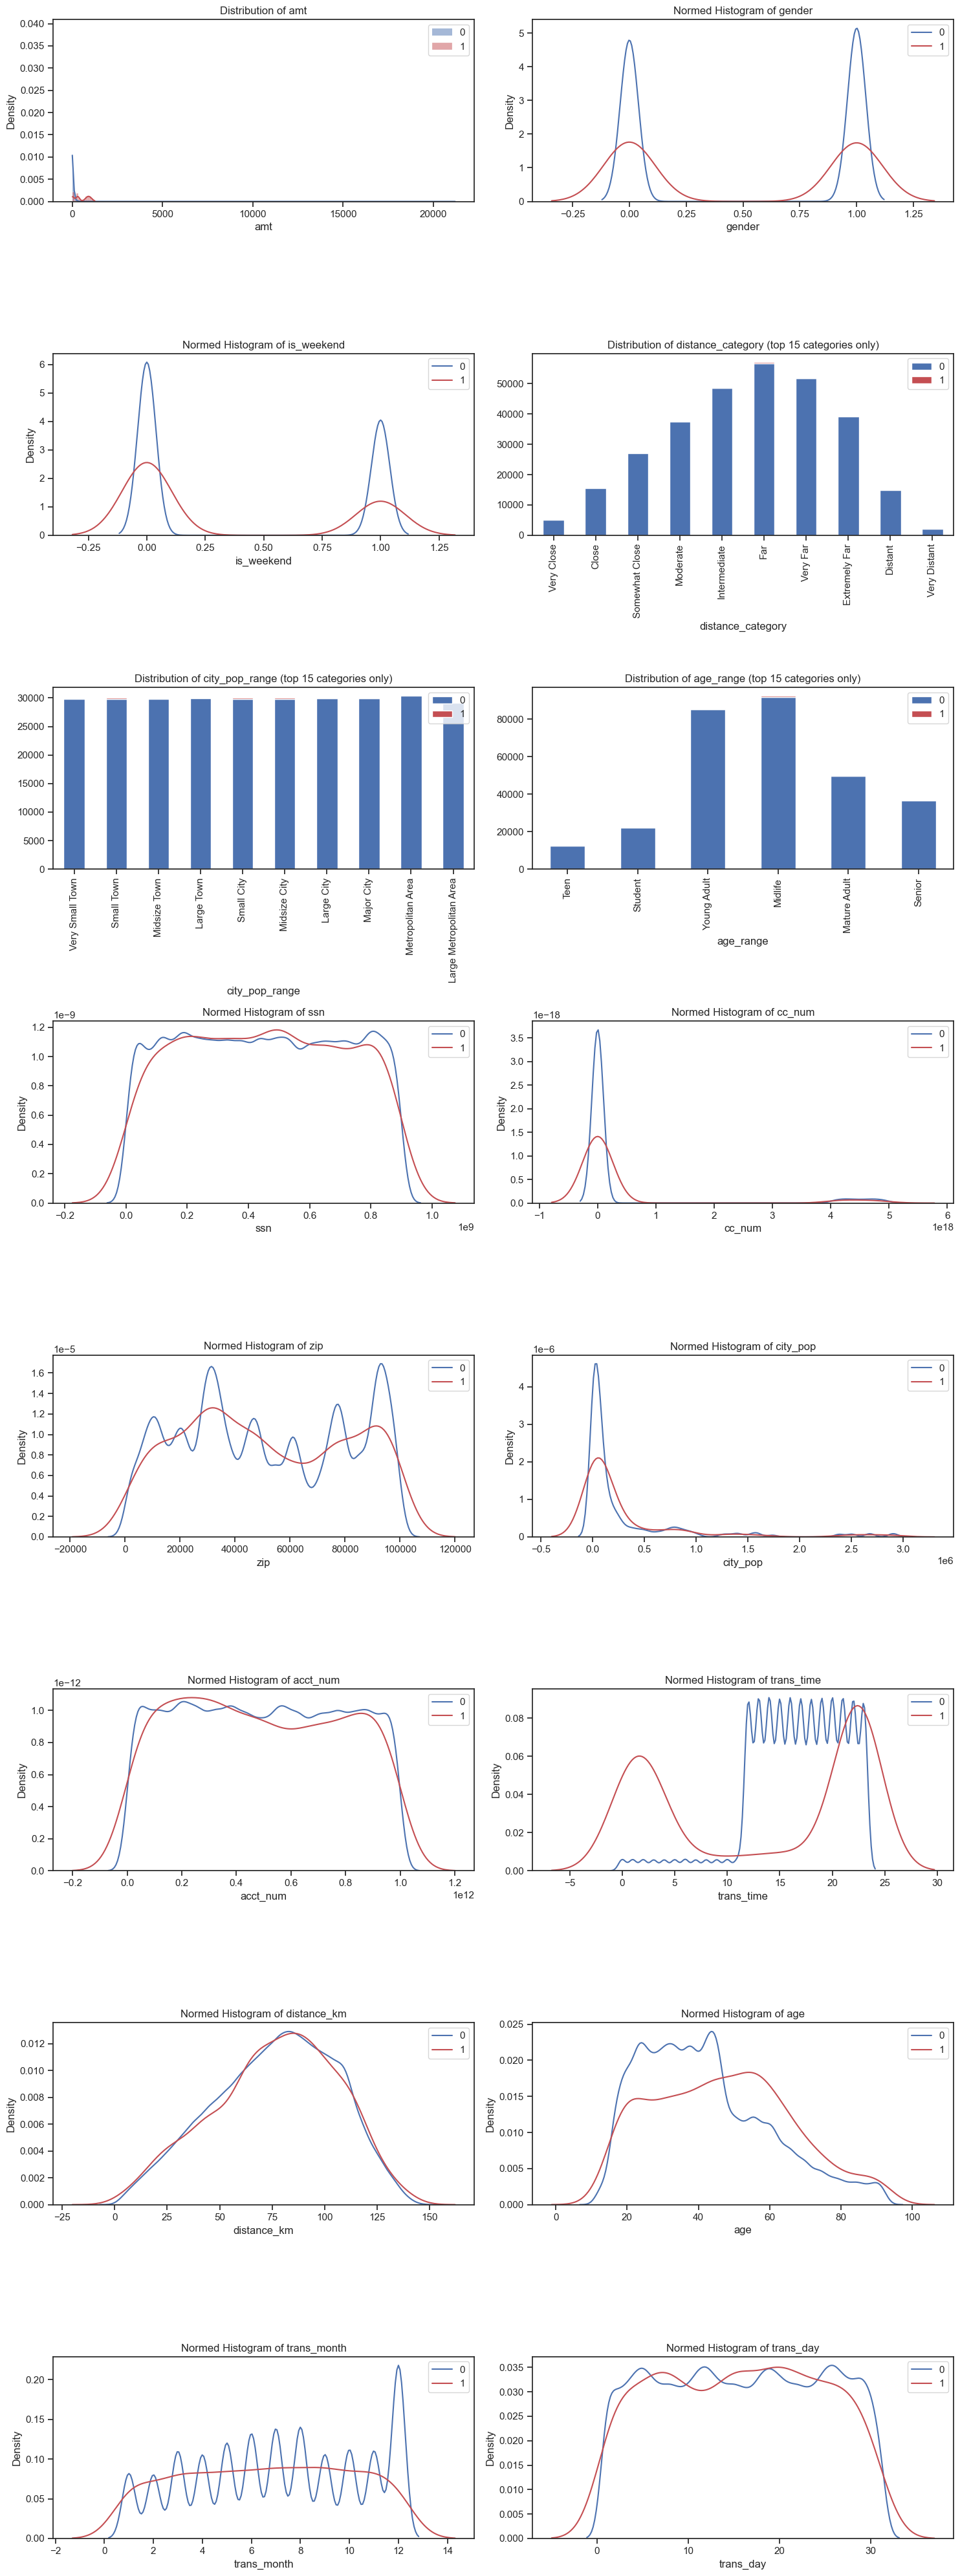

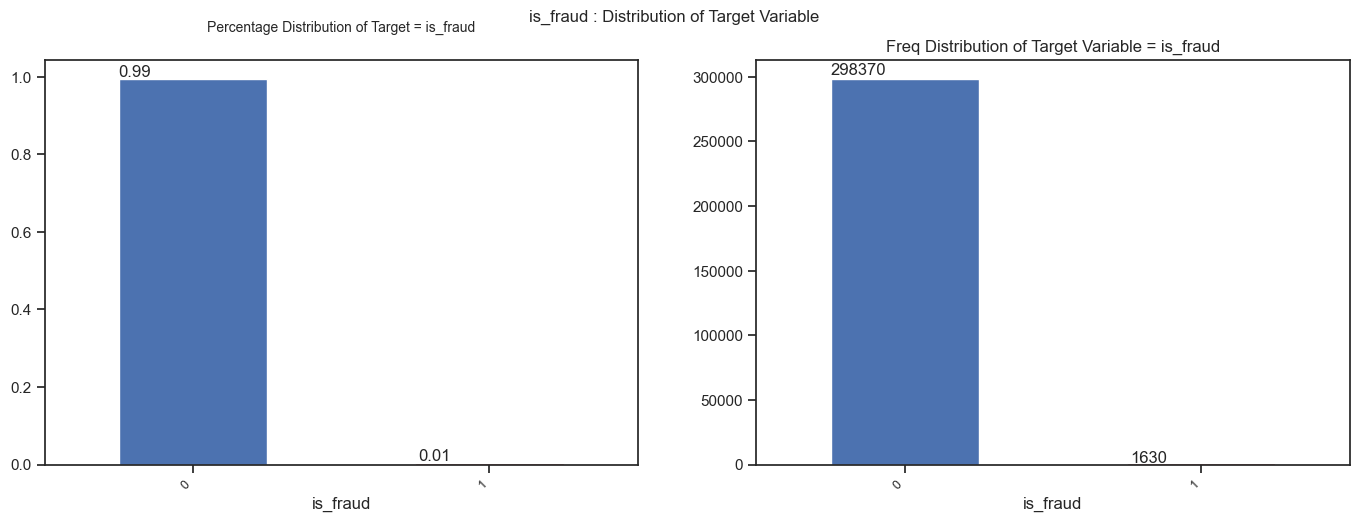

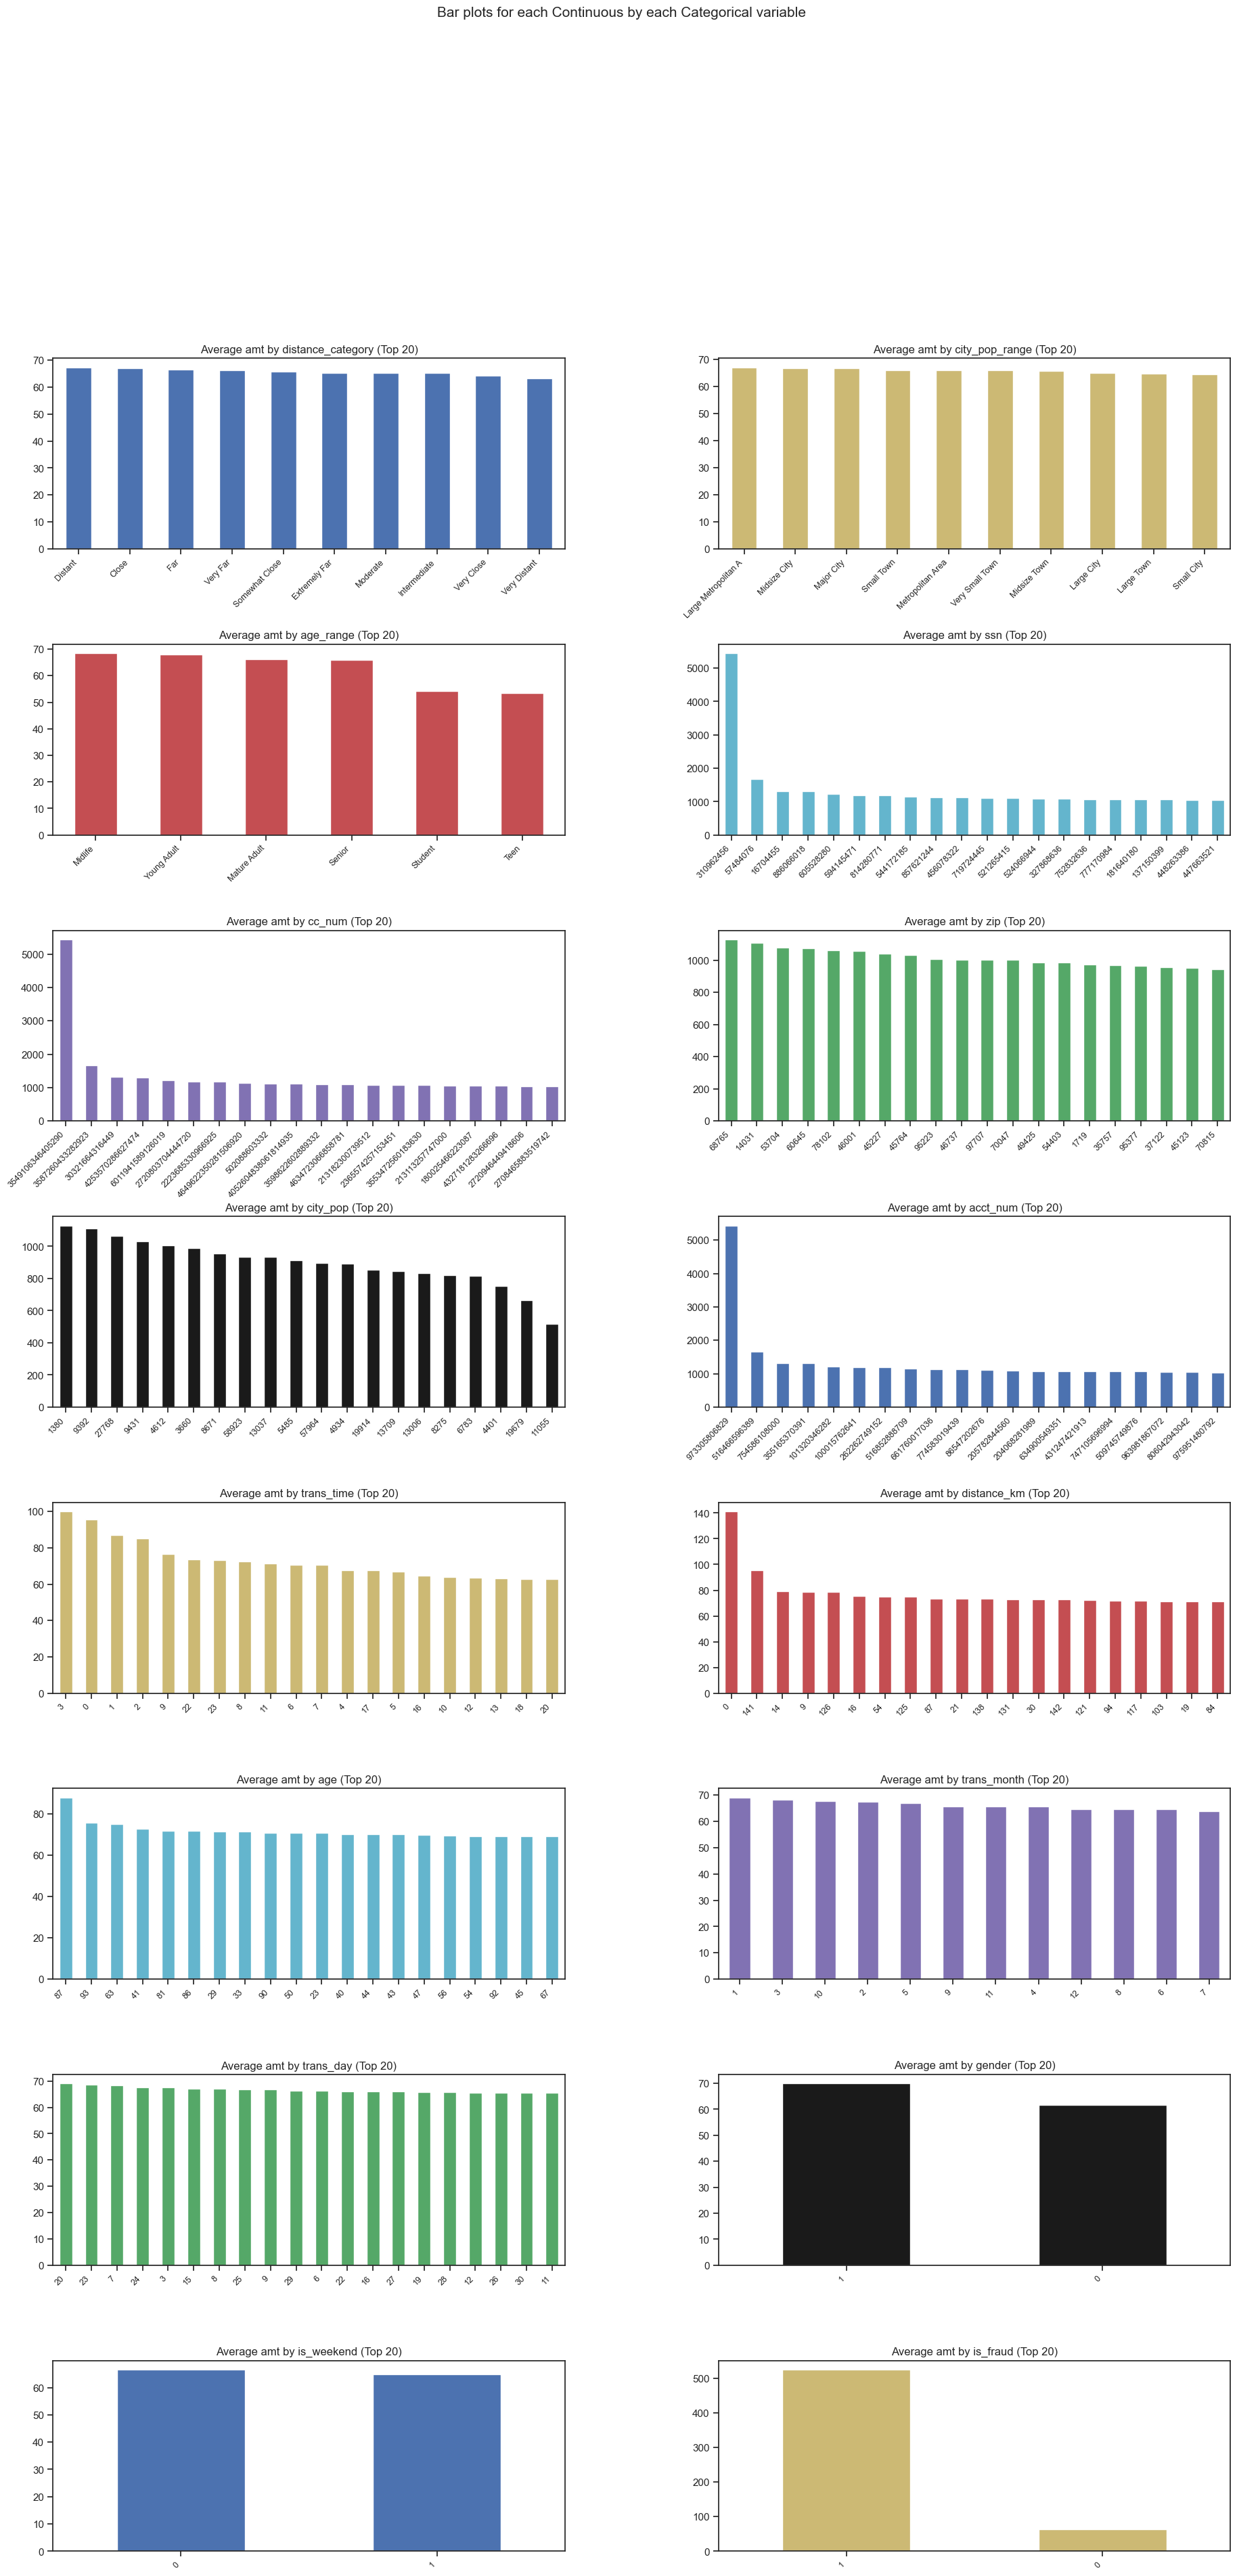

All Plots done
Time to run AutoViz = 84 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


ssn           cc_num         gender      city      \
112692  520507321     4052964383680275     1         Lahaina   
19498   585638858     4663127203593554     1        Gallatin   
31689   516900148     4086250049094709     0          Adrian   
231780  604310699     6585508420104475     0         Buffalo   
4298    402987500     6011172198219835     0      Watervliet   
...           ...                  ...     ...           ...   
211543  410887795  4144853679289089113     0       Arlington   
86293   720140782     3552761988024272     1    Los Alamitos   
122579  665572534     2234636320661312     0         Artesia   
152315  704459768  4605847365427264466     0       Inglewood   
117952  538946353     6011285655679216     1    Jacksonville   

             state          zip   city_pop  \
112692   Low-Volume Mixed  96761    22156    
19498   TN-KY-AL-LA-MS-AR  37066    42758    
31689         MI-IN-MN-WI  49221    41310    
231780                 NY  14207   564824    
4298                   NY  12189    17568    
...                   ...    ...       ...   
211543                 TX  76012   370281    
86293                  CA  90720    21751    
122579                 CA  90701    16591    
152315                 CA  90303   135222    
117952                 FL  32277   847415    

                       job                     acct_num    \
112692  Psychology & Social Service Workers  159695923613   
19498    Education & Research Professionals  207343593718   
31689      Medical & Healthcare Specialists  913364245718   
231780  Psychology & Social Service Workers  960384562486   
4298     Education & Research Professionals  493272881503   
...                                     ...           ...   
211543       Media & Creative Professionals  899276429618   
86293         Hospitality & Tourism Workers  436727946828   
122579      Engineering & Technical Experts  473774069909   
152315     Medical & Healthcare Specialists  258827137894   
117952     Medical & Healthcare Specialists  985616155229   

                profile                       trans_num              \
112692   adults 2550 female urban  b29ddf1cf3b6885b9a71c1a294579531   
19498   young adults female urban  344c7680d790a8526533876a7bdddbb3   
31689     young adults male urban  d5ae9bd821d63dfe767d5b578d681f25   
231780     adults 50up male urban  c4f480b3508c3c8f72163a14206837bf   
4298       adults 2550 male urban  2df0aeb2f6134e52fb279842bedb23da   
...                           ...                               ...   
211543     adults 50up male urban  5b66d85f46eb6c8e451d543eb1eaeca4   
86293    adults 2550 female urban  8d1ab4d077741414ed93f83f83c4ffb9   
122579     adults 2550 male urban  f3714ce4e22a0a95a86b5207b0ca2093   
152315     adults 2550 male urban  5aba2eefbc0fa5a02531fb99b34b0a0a   
117952   adults 2550 female urban  871aa05857efc2581a1d460dfed4275e   

        trans_time     category       amt           merchant           \
112692      12       personal_care   16.38    Kihn Brakus and Goyette   
19498       13                home    1.72            Champlin-Casper   
31689       14              travel    7.00           Little-Gleichner   
231780      22              travel    1.69             Mosciski Group   
4298        21      health_fitness  296.97           Thompson-Gleason   
...            ...             ...     ...                        ...   
211543      23      health_fitness    7.30             Ziemann-Waters   
86293       17       entertainment   57.52                Klein Group   
122579      20           kids_pets    7.45                  Fahey Inc   
152315      16      health_fitness    2.71  Cronin Kshlerin and Weber   
117952      16         food_dining   73.81         Abernathy and Sons   

        distance_km distance_category   city_pop_range    age  age_range    \
112692       42       Somewhat Close        Midsize Town  43       Midlife   
19498        82                  Far          Small City  16          

In [17]:
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(df, depVar="is_fraud",max_rows_analyzed=300000)
           

 ##### <font color='blue'> sweetviz

In [22]:
# Analyze and specify the target column (classification or regression)
report = sv.analyze(df, target_feat='is_fraud')

                                             |                                             | [  0%]   00:00 ->…


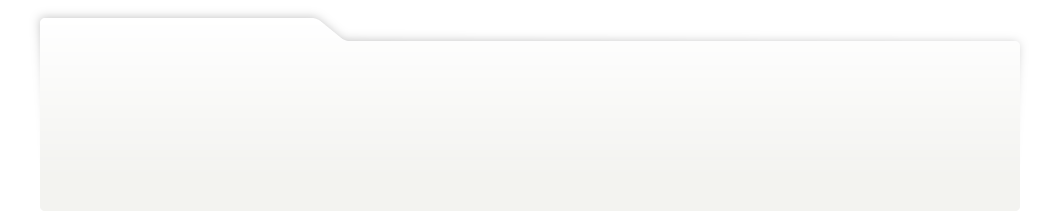
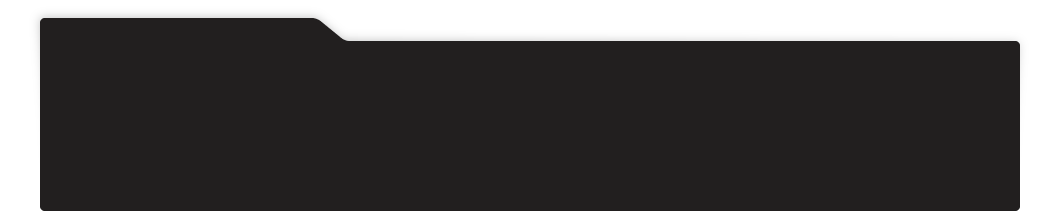
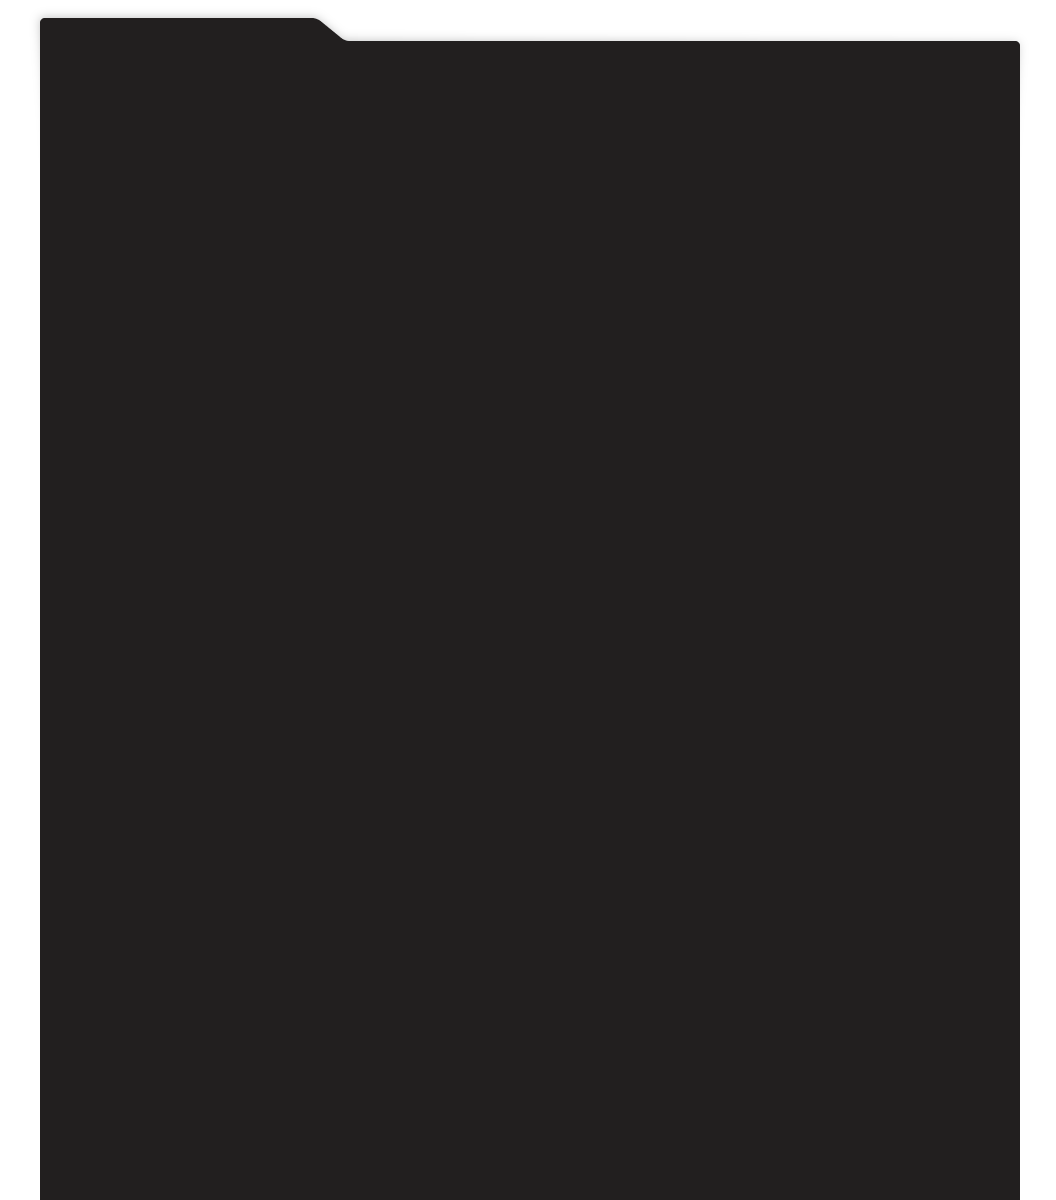
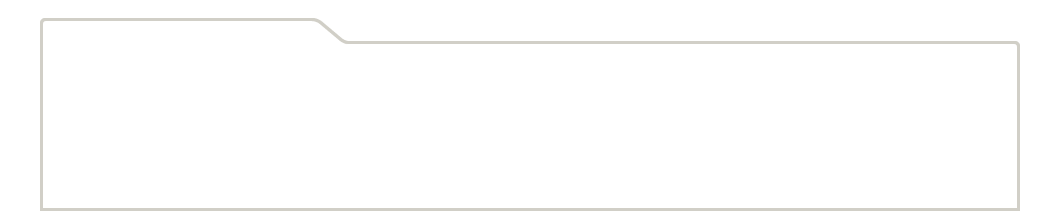
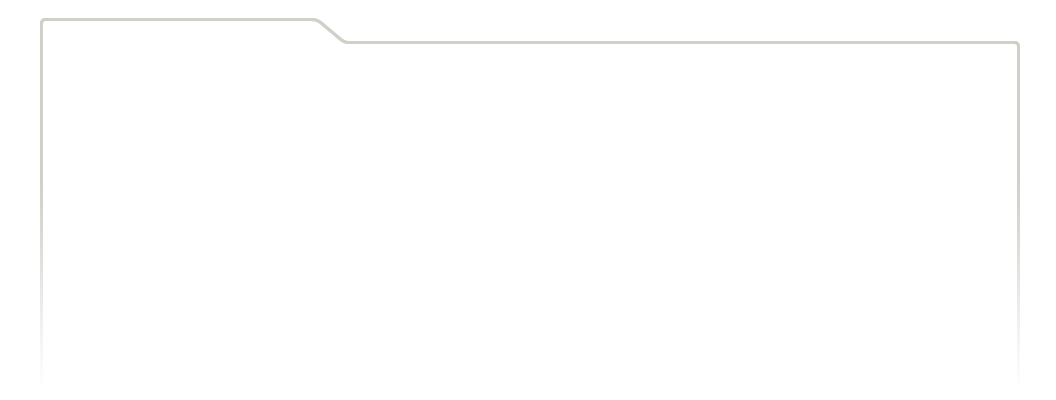
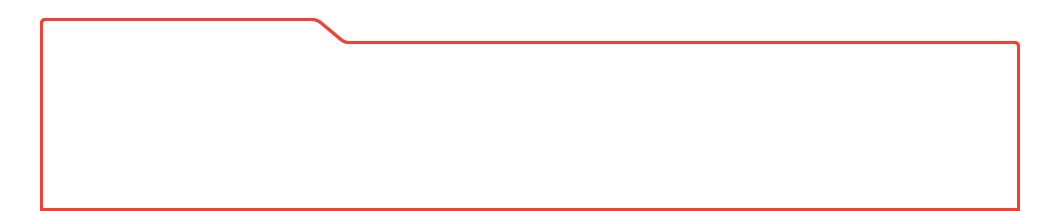
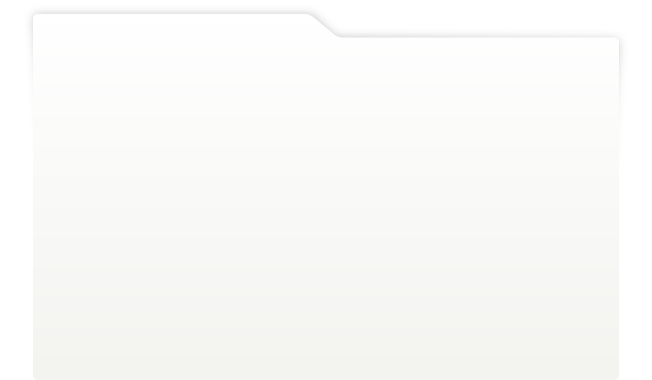
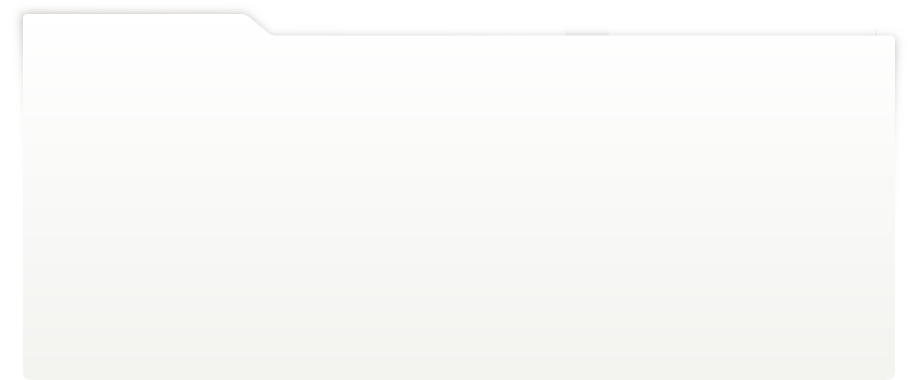
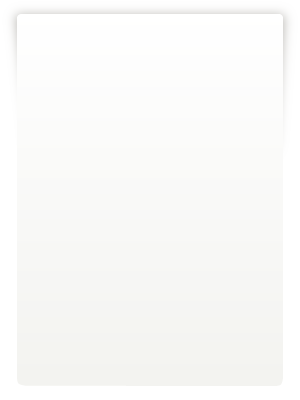
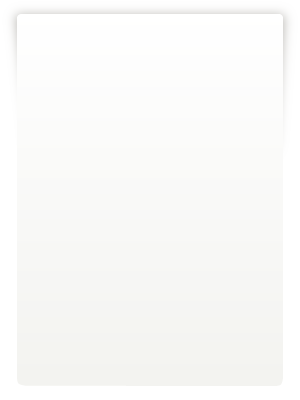
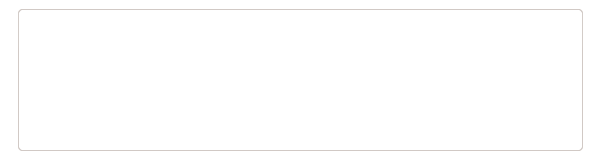
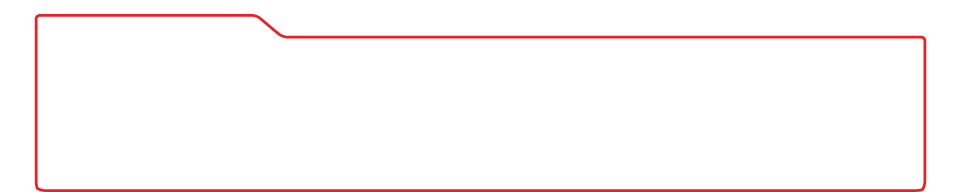
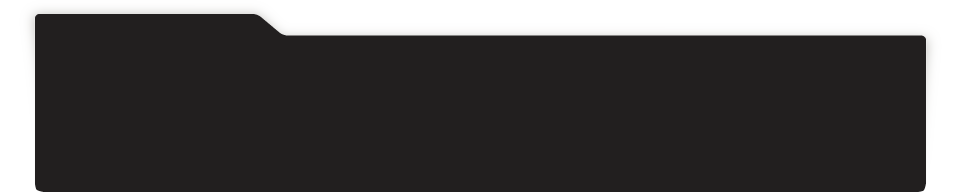
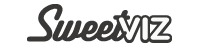
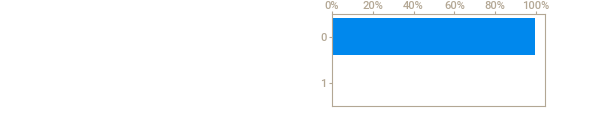
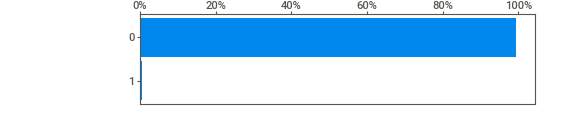
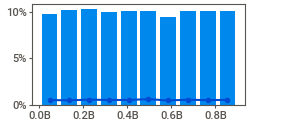
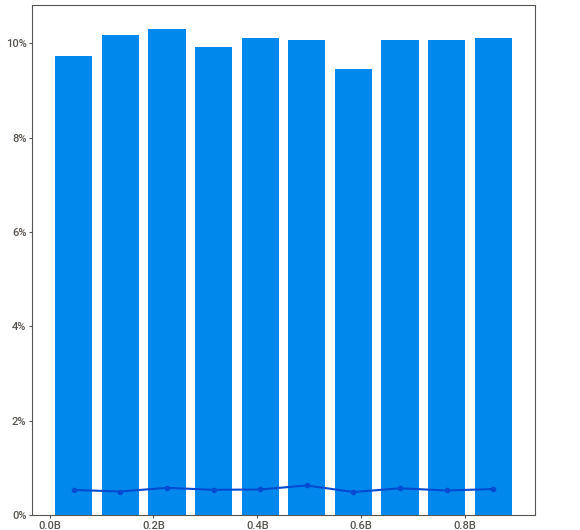
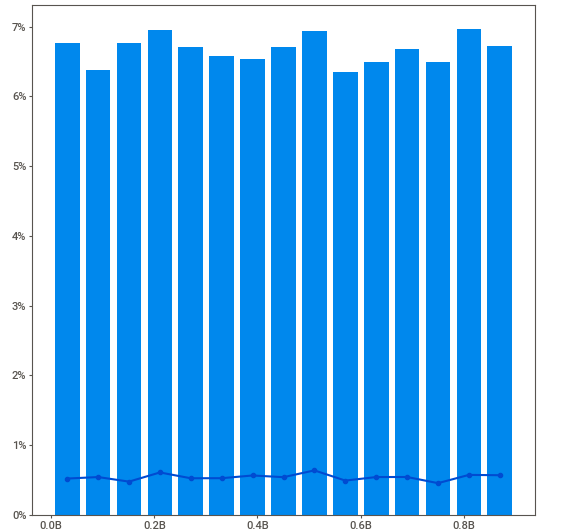
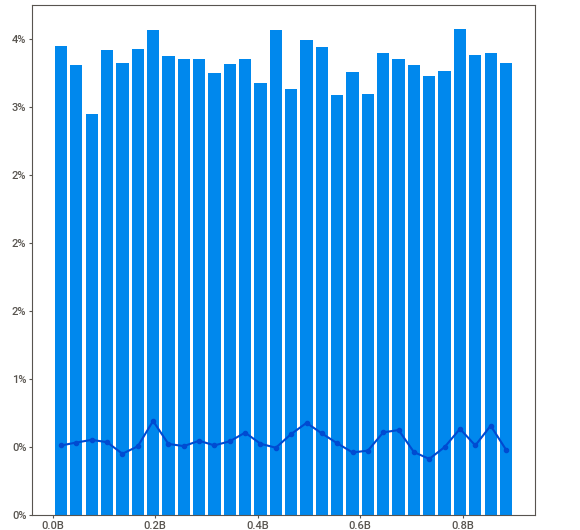
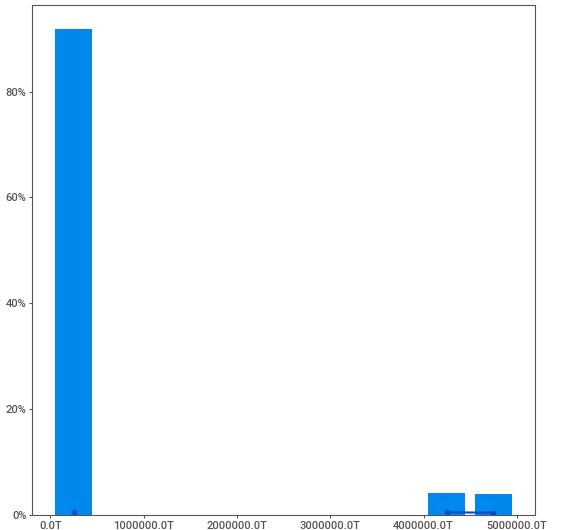
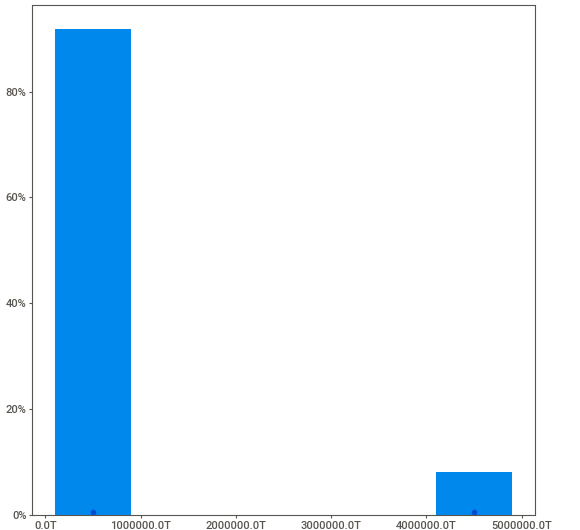
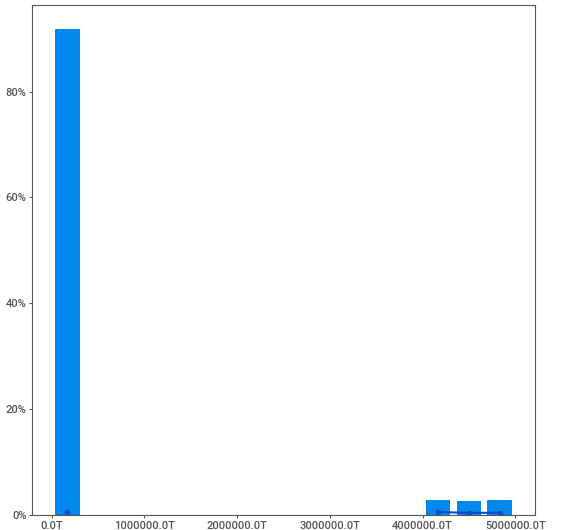
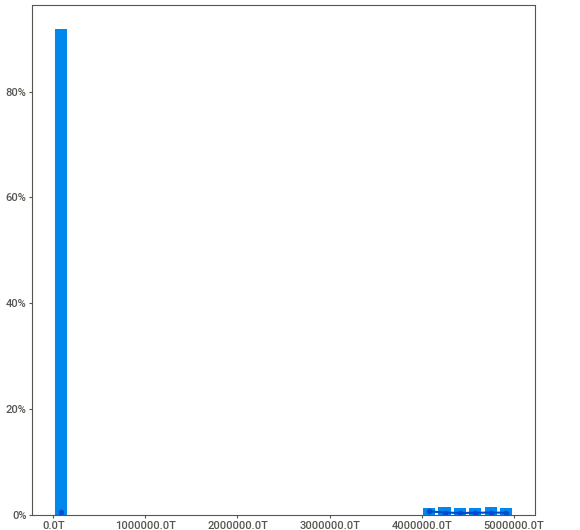
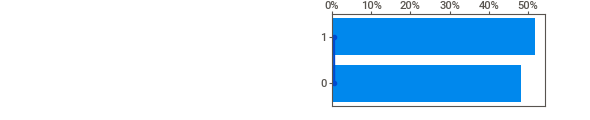
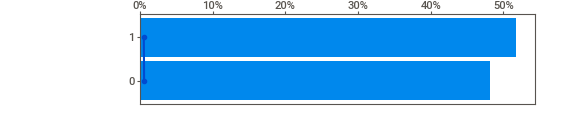
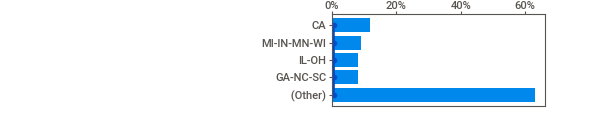
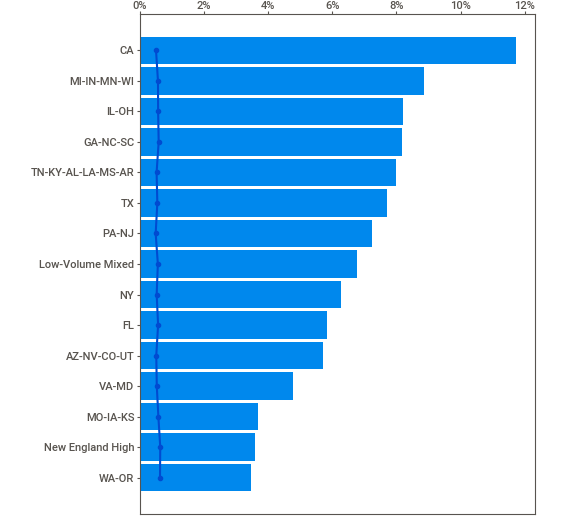
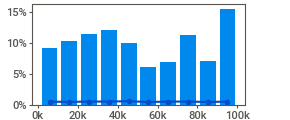
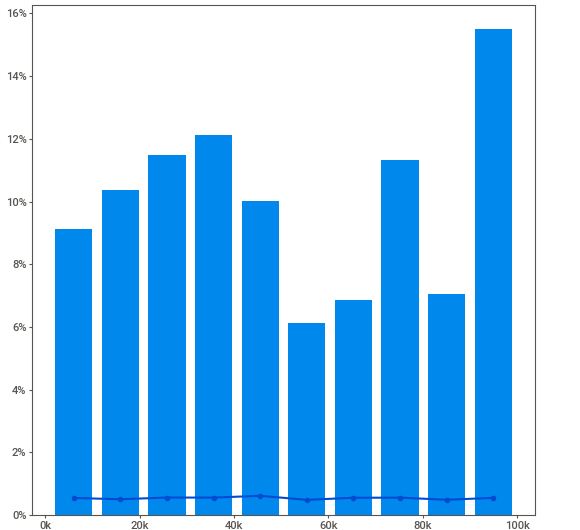
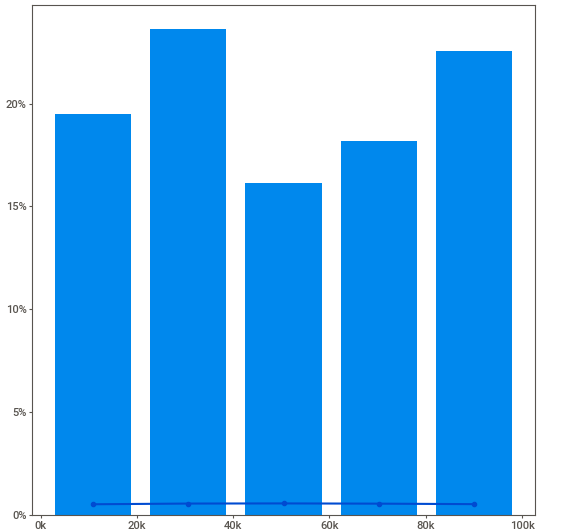
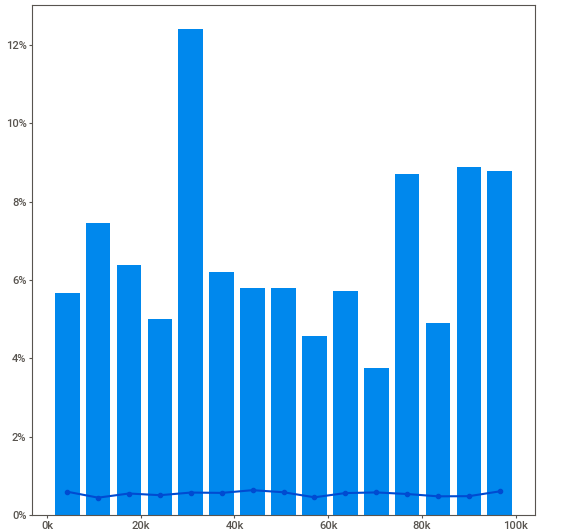
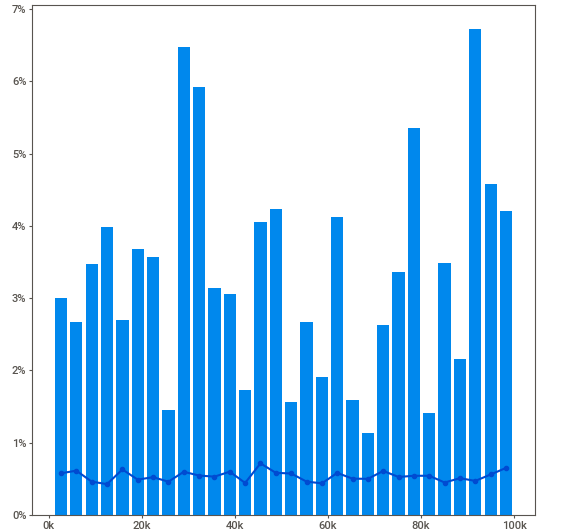
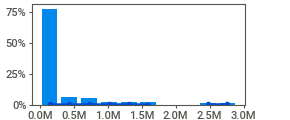
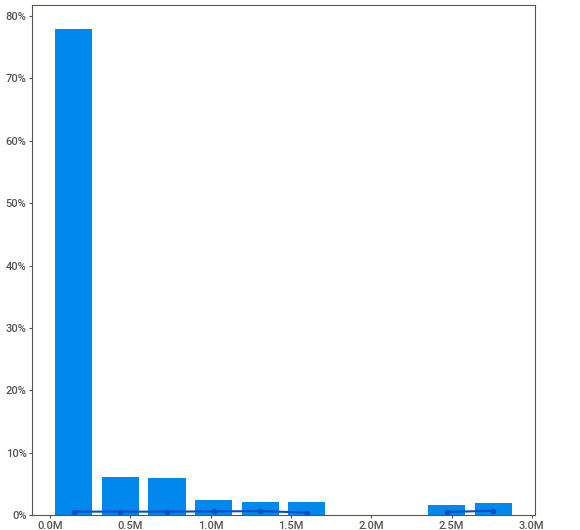
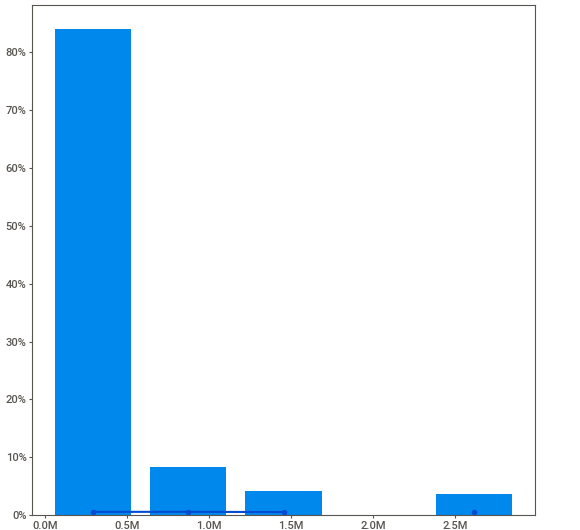
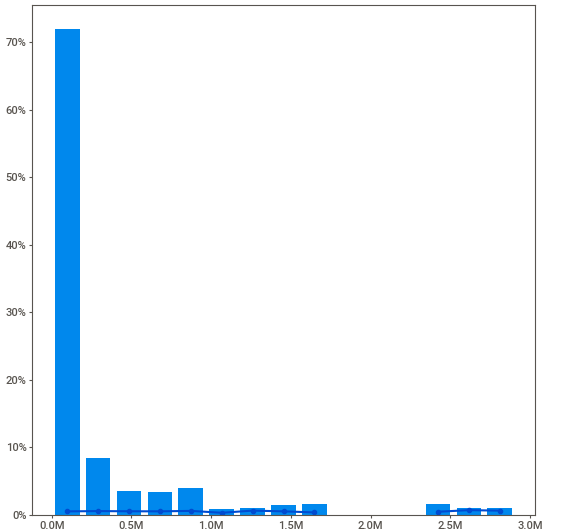
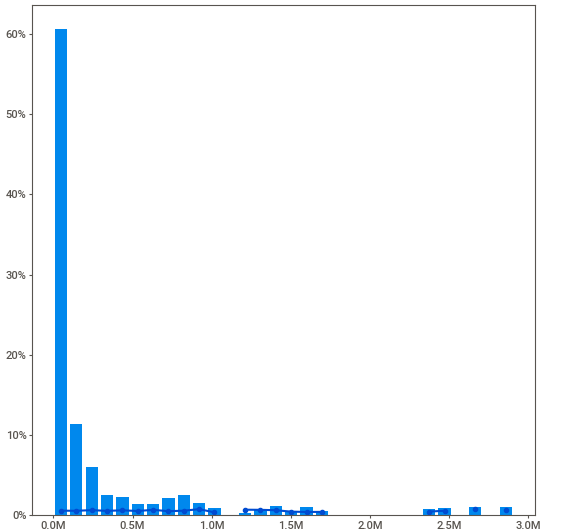
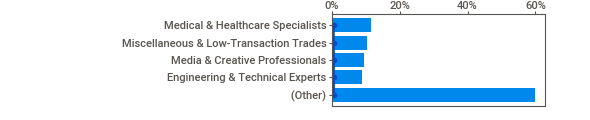
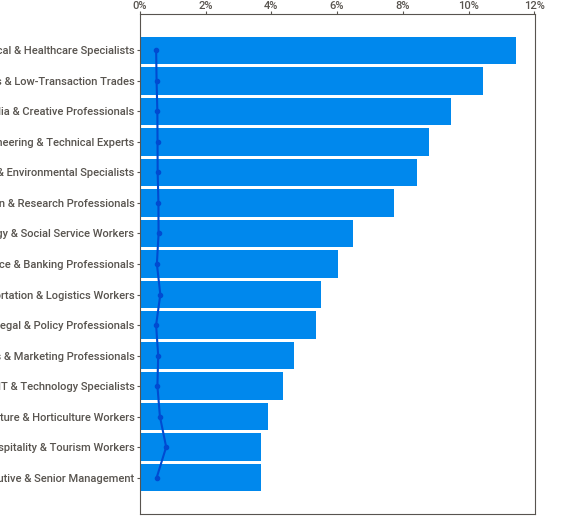
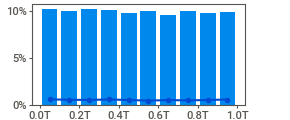
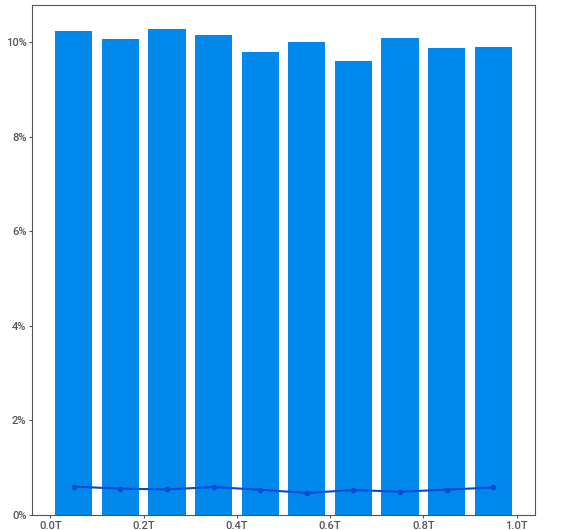
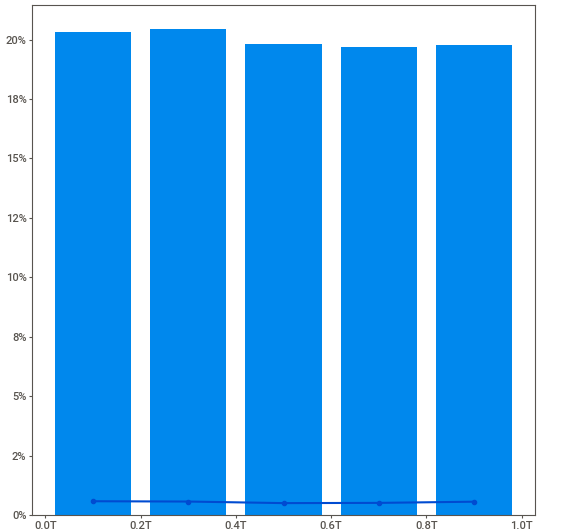
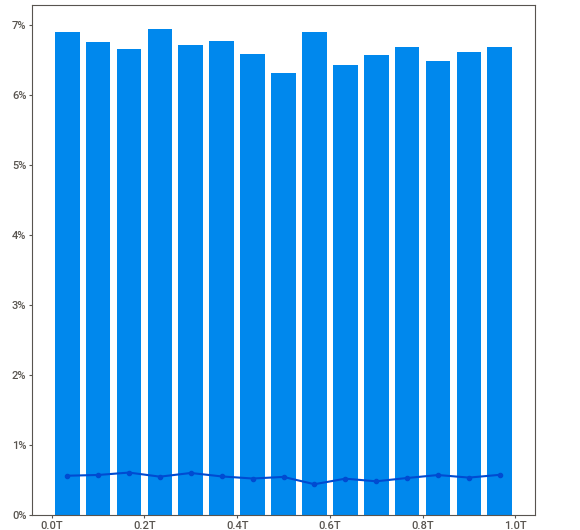
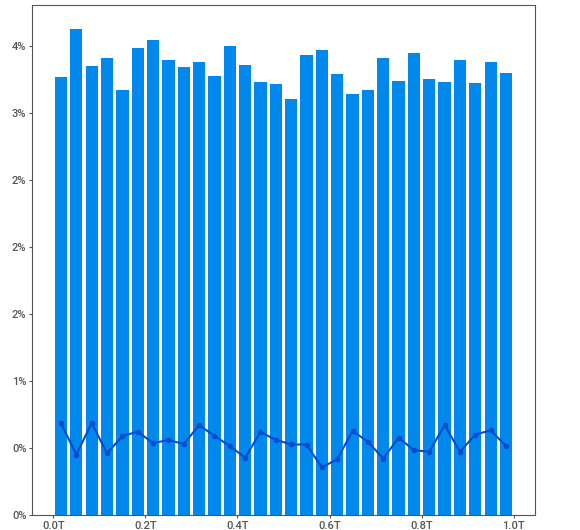
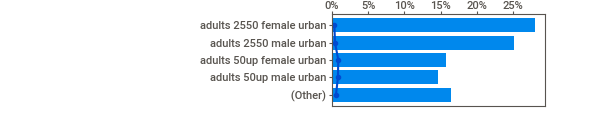
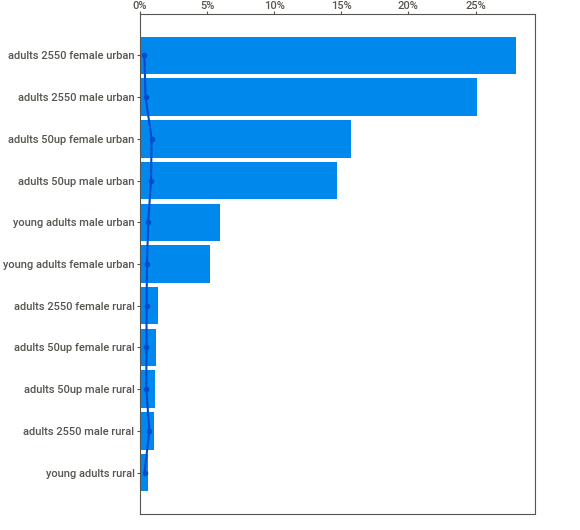
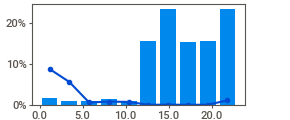
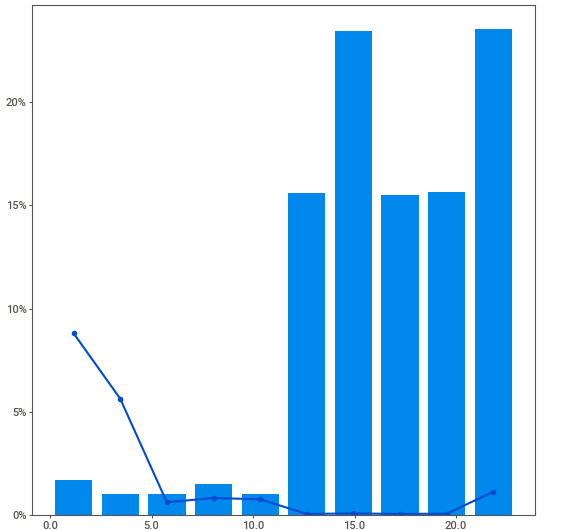
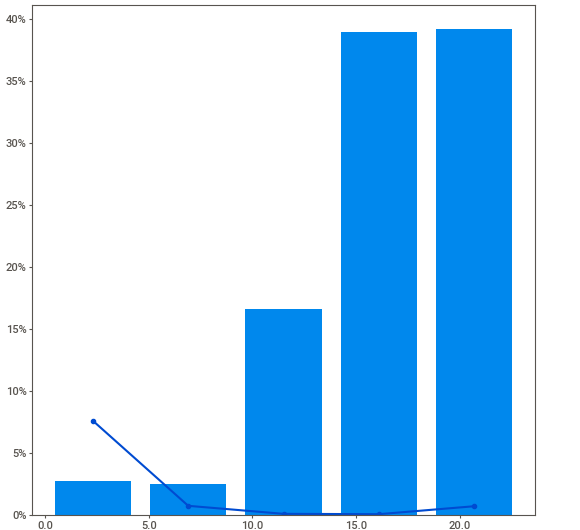
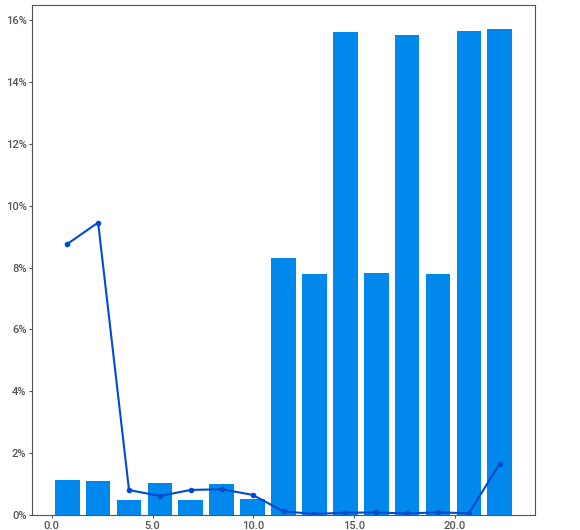
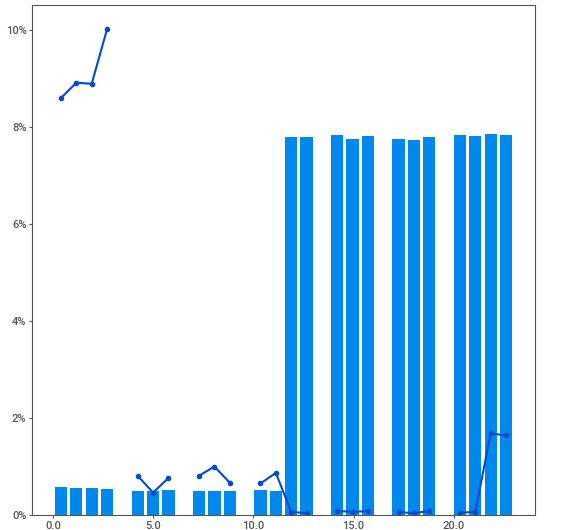
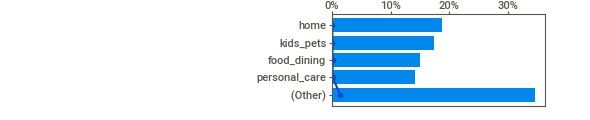
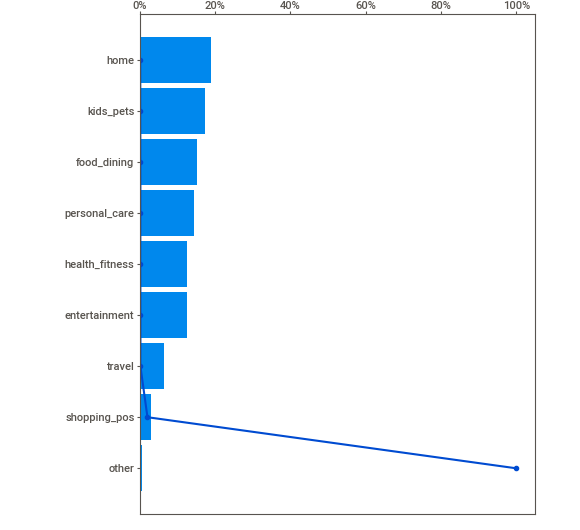
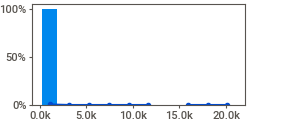
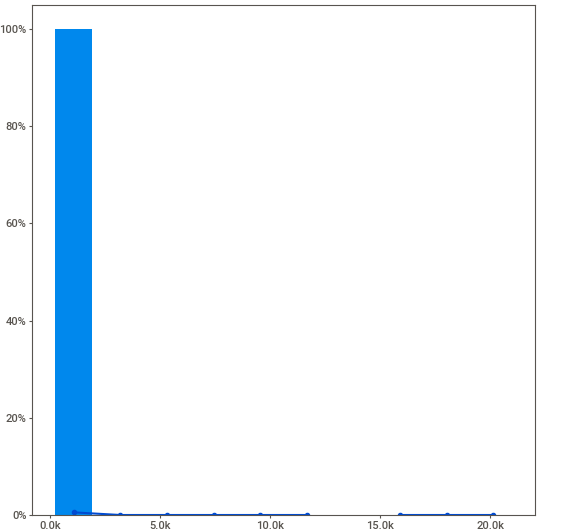
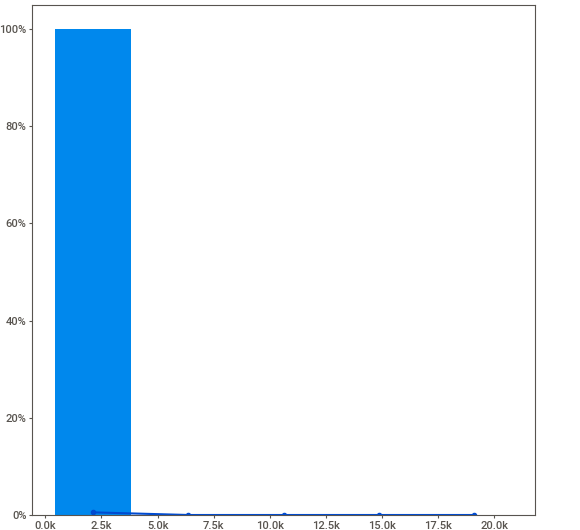
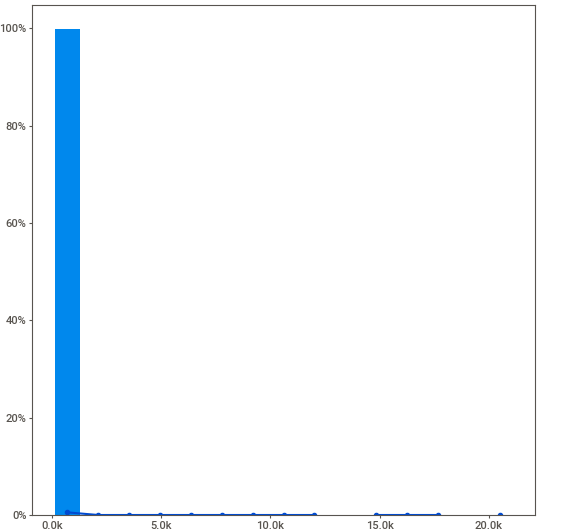
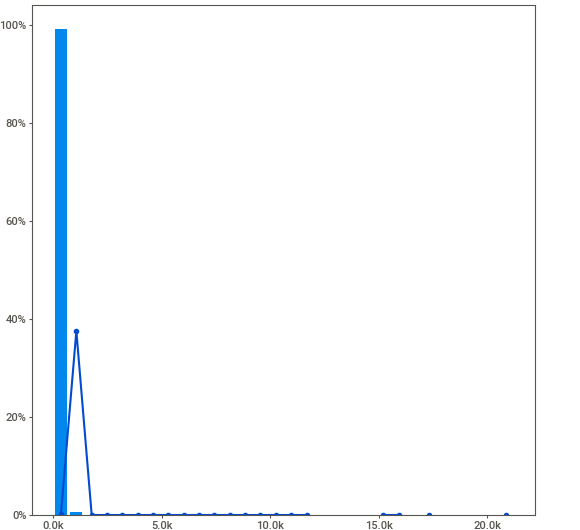
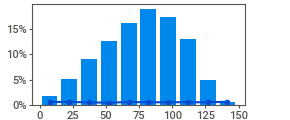
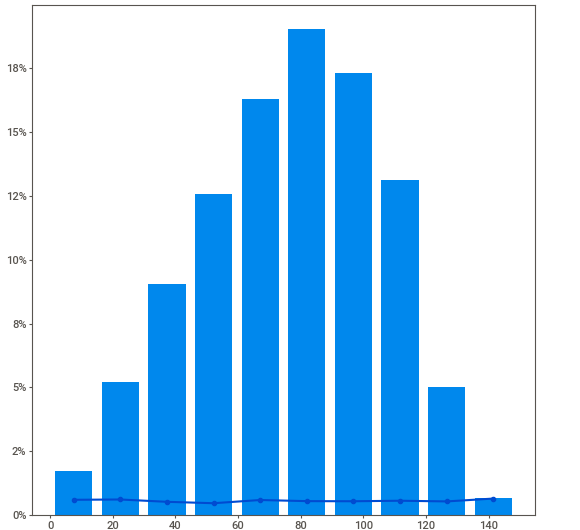
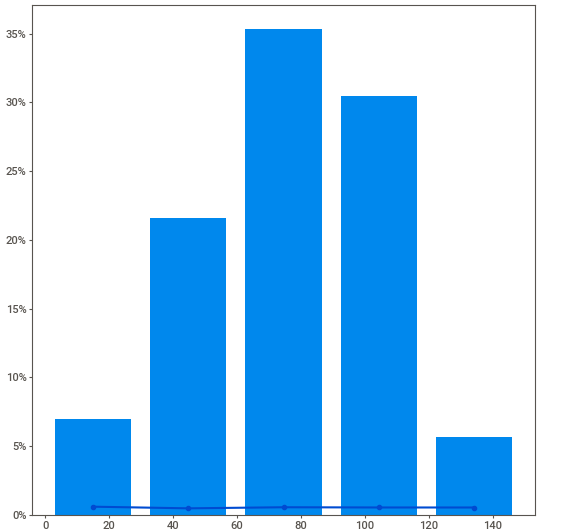
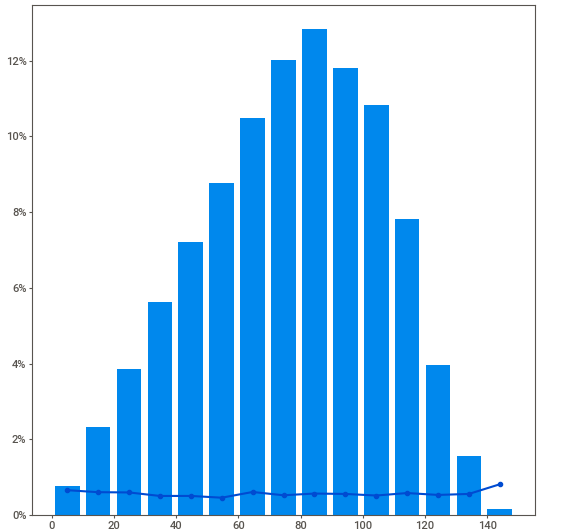
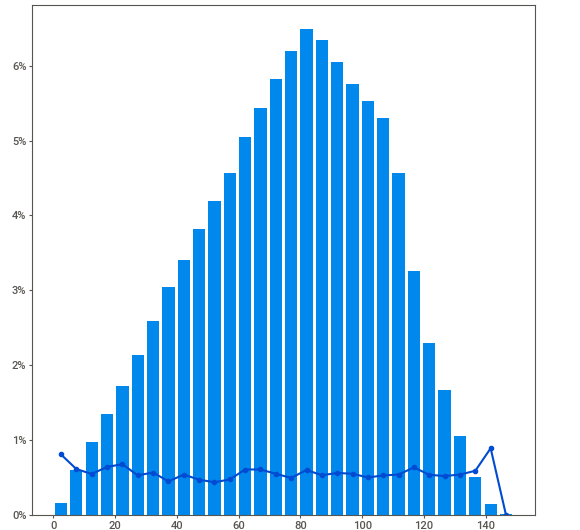
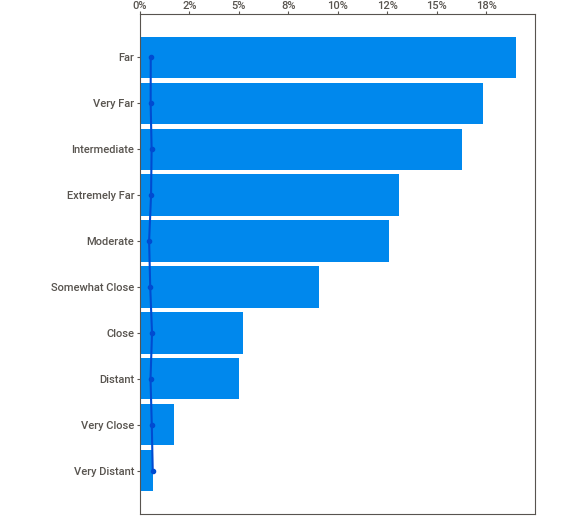
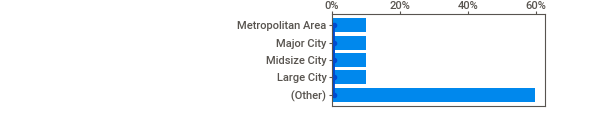
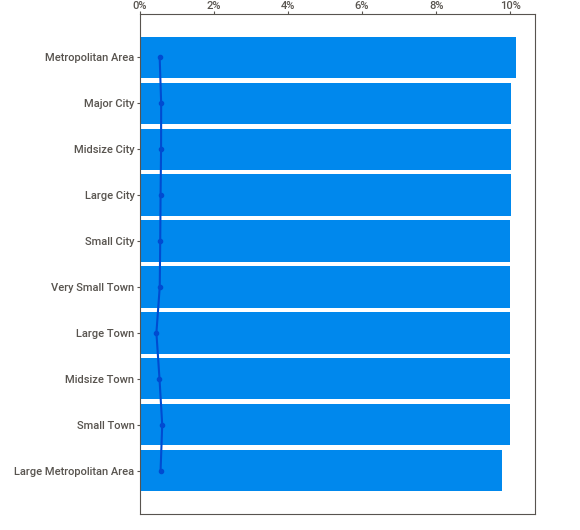
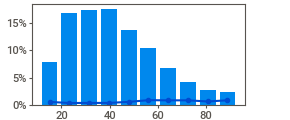
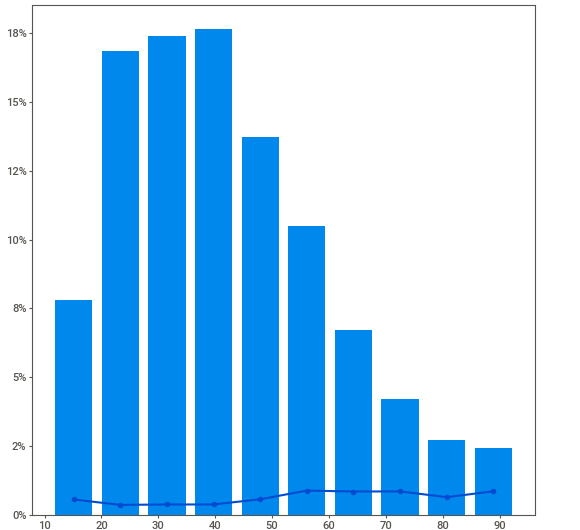
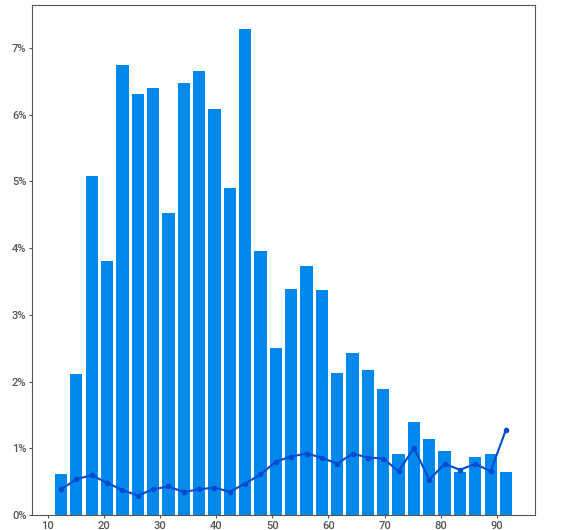
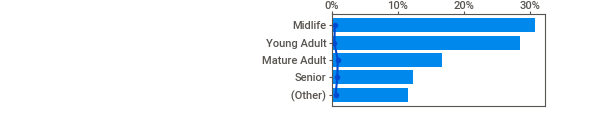
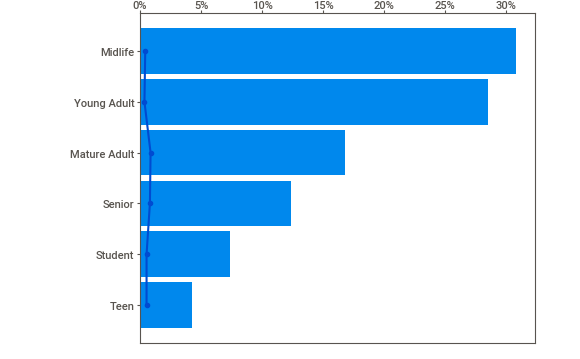
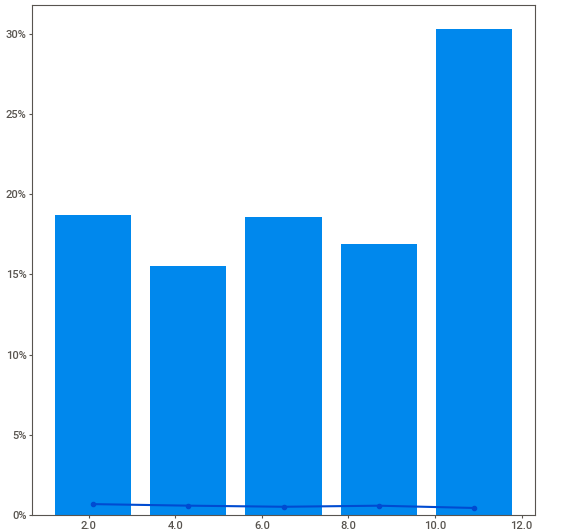
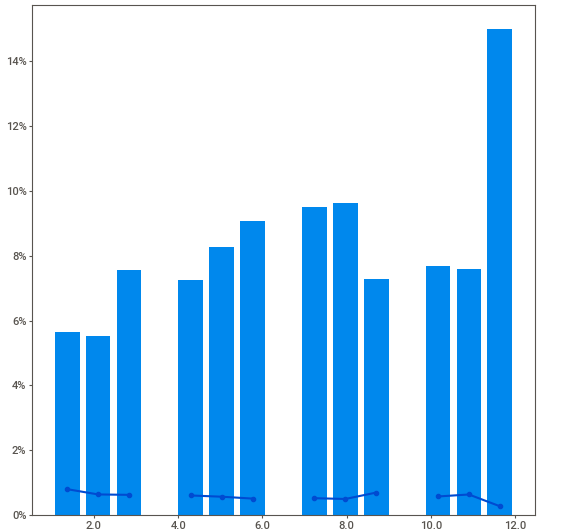
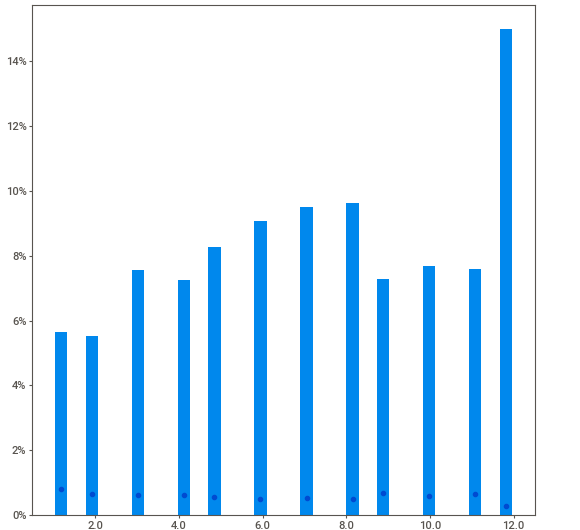
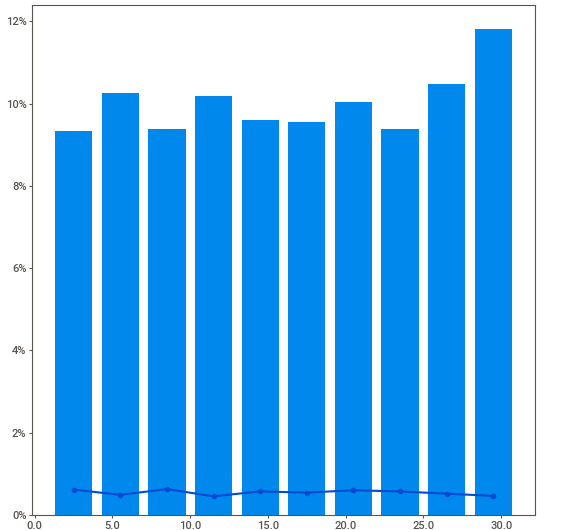
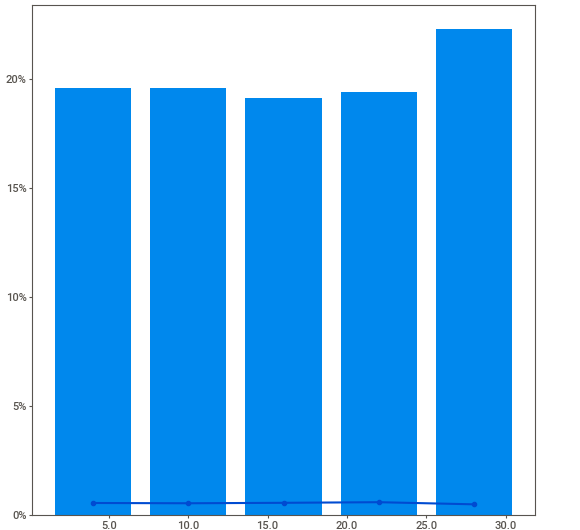
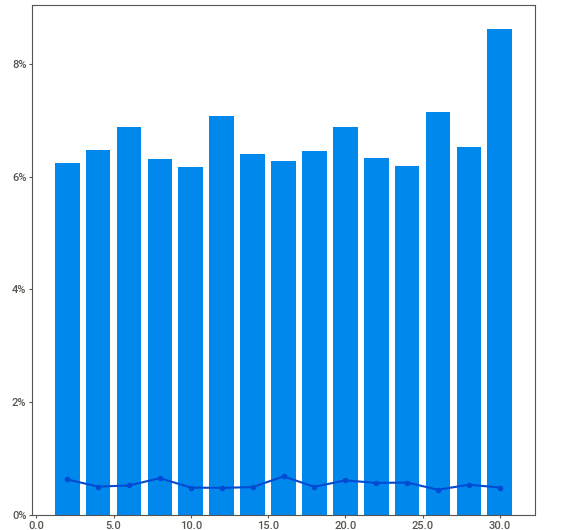
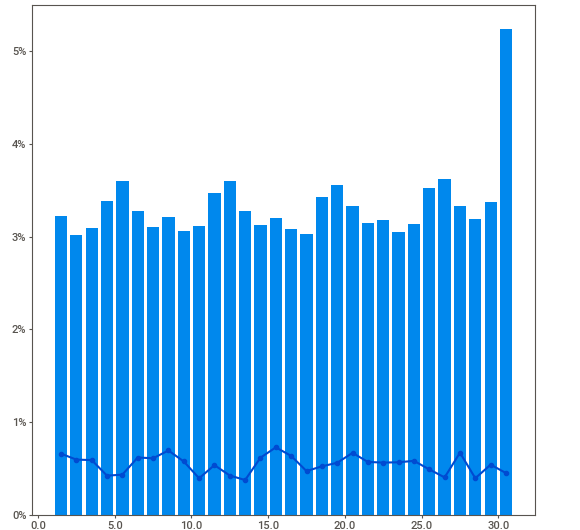
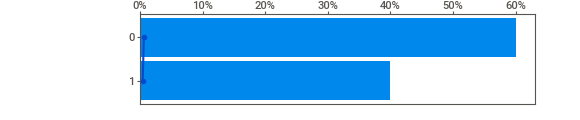
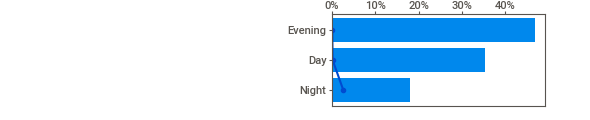
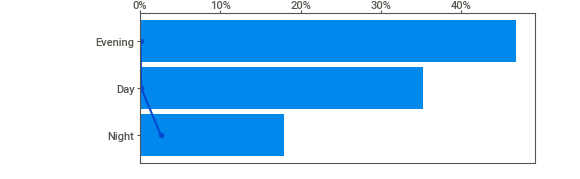
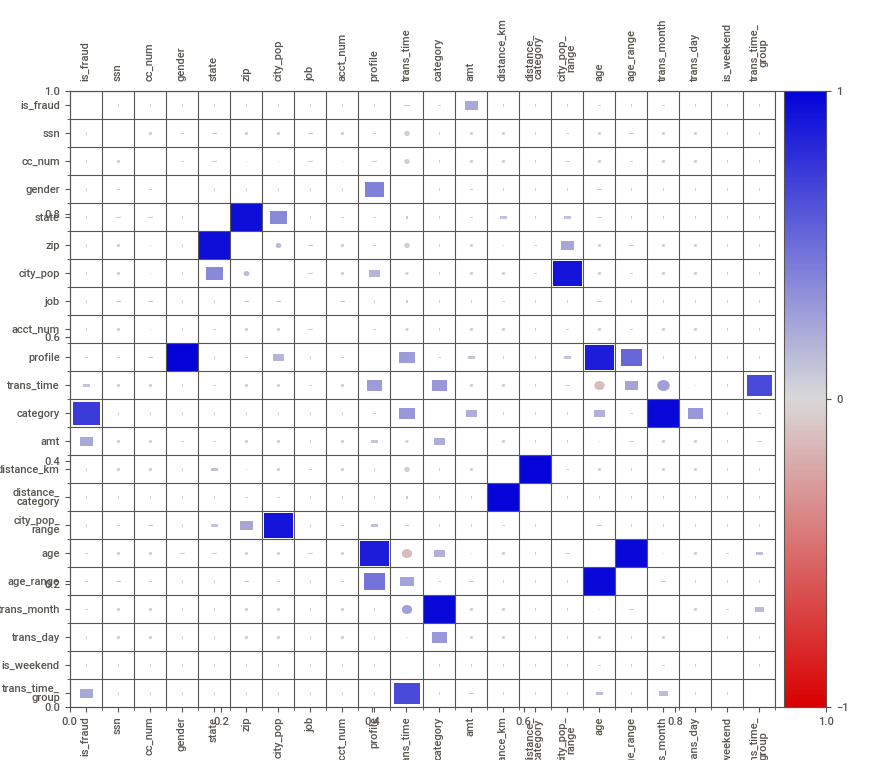
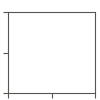

In [24]:
report.show_notebook(w="100%", h="500")

# EDA - Explenatory Data Analysis

#### <font color='Indigo'> Descriptive Statistics

In [28]:
df.describe()

ssn         cc_num        gender           zip         city_pop    \
count  3.000000e+05  3.000000e+05  300000.000000  300000.000000  3.000000e+05   
mean   4.506057e+08  3.714582e+17       0.517763   51157.361887  2.958743e+05   
std    2.599024e+08  1.236841e+18       0.499685   29694.286559  5.694311e+05   
min    1.076840e+06  6.040003e+10       0.000000    1002.000000  4.400000e+01   
25%    2.258682e+08  3.846108e+13       0.000000   27603.000000  1.770000e+04   
50%    4.487250e+08  3.506370e+15       1.000000   48126.000000  6.136100e+04   
75%    6.764797e+08  4.589016e+15       1.000000   78254.000000  2.366600e+05   
max    8.999105e+08  4.999689e+18       1.000000   99929.000000  2.906700e+06   

         acct_num     trans_time         amt         is_fraud     \
count  3.000000e+05  300000.000000  300000.000000  300000.000000   
mean   4.967820e+11      16.745680      65.890231       0.005433   
std    2.892582e+11       4.538995     181.704306       0.073511   
min    1.837412e+07       0.000000       1.000000       0.000000   
25%    2.452714e+11      14.000000       8.260000       0.000000   
50%    4.946567e+11      17.000000      33.270000       0.000000   
75%    7.492637e+11      20.000000      76.630000       0.000000   
max    9.999583e+11      23.000000   21209.590000       1.000000   

        distance_km        age        trans_month     trans_day    \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean       76.478633      41.750397       7.135030      15.887580   
std        29.175519      17.876807       3.423084       8.839555   
min         0.000000      11.000000       1.000000       1.000000   
25%        56.000000      28.000000       4.000000       8.000000   
50%        79.000000      39.000000       7.000000      16.000000   
75%        99.000000      53.000000      10.000000      24.000000   
max       149.000000      93.000000      12.000000      31.000000   

        is_weekend    
count  300000.000000  
mean        0.399200  
std         0.489735  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### <font color='Indigo'> Target Value

In [32]:
# Create the countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(x='is_fraud', data=df, palette='Set2')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.title("Fraud vs Non-Fraud Count", fontsize=14)
plt.xlabel("Fraud Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [34]:
avg_regular_day_fraud = df[df['is_weekend'] == 0]['is_fraud'].mean()
avg_weekend_day_fraud = df[df['is_weekend'] == 1]['is_fraud'].mean()

print(f"Average Credit Card Frauds on Regular Days: {avg_regular_day_fraud}")
print(f"Average Credit Card Frauds on Weekend Days: {avg_weekend_day_fraud}")
print(df['is_fraud'].mean())

Average Credit Card Frauds on Regular Days: 0.006158455392809587
Average Credit Card Frauds on Weekend Days: 0.004342017368069473
0.005433333333333333


##### <font color='blue'> plot card fraud distribution by state group

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ssn                300000 non-null  int32   
 1   cc_num             300000 non-null  int64   
 2   gender             300000 non-null  int32   
 3   city               300000 non-null  string  
 4   state              300000 non-null  string  
 5   zip                300000 non-null  int64   
 6   city_pop           300000 non-null  int64   
 7   job                300000 non-null  string  
 8   acct_num           300000 non-null  int64   
 9   profile            300000 non-null  string  
 10  trans_num          300000 non-null  string  
 11  trans_time         300000 non-null  int32   
 12  category           300000 non-null  string  
 13  amt                300000 non-null  float64 
 14  is_fraud           300000 non-null  int64   
 15  merchant           300000 non-null

In [39]:
# Filter the DataFrame for fraud transactions (is_fraud = 1)
fraud_df = df[df['is_fraud'] == 1]

# Group by 'state_group' and count the number of fraud transactions
fraud_counts_by_state_group = fraud_df['state'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts_by_state_group.index, y=fraud_counts_by_state_group.values, palette='viridis')

# Add labels and title
plt.xlabel('State Group', fontsize=12)
plt.ylabel('Number of Fraud Transactions', fontsize=12)
plt.title('Number of Fraud Transactions by State Group', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for index, value in enumerate(fraud_counts_by_state_group.values):
    plt.text(index, value + 10, f"{value:,}", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

##### <font color='blue'> plot card fraud distribution by distance from merchant

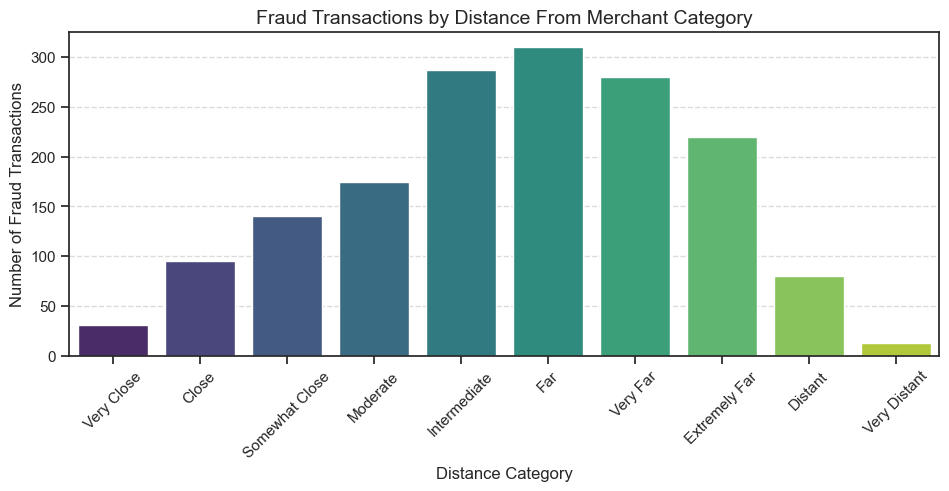

In [42]:
# Filter the DataFrame for fraud transactions (is_fraud == 1)
fraud_df = df[df['is_fraud'] == 1]

# Plot the count of fraud transactions by 'distance_bin_category'
plt.figure(figsize=(10, 4))
sns.countplot(x='distance_category', data=fraud_df, palette='viridis')

# Add labels and title
plt.xlabel('Distance Category', fontsize=12)
plt.ylabel('Number of Fraud Transactions', fontsize=12)
plt.title('Fraud Transactions by Distance From Merchant Category', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### <font color='blue'> plot card fraud distribution by jobs group

In [45]:
# Filter the DataFrame for fraud transactions (is_fraud == 1)
fraud_df = df[df['is_fraud'] == 1]

# Plot the count of fraud transactions by 'job_group'
plt.figure(figsize=(12, 6))  # Increased figure width for readability
sns.countplot(x='job', data=fraud_df, palette='viridis')

# Add labels and title
plt.xlabel('Job Group', fontsize=14)
plt.ylabel('Number of Fraud Transactions', fontsize=14)
plt.title('Fraud Transactions by Job Group', fontsize=16)

# Improve x-axis labels readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

##### <font color='blue'> plot card fraud distribution by profile

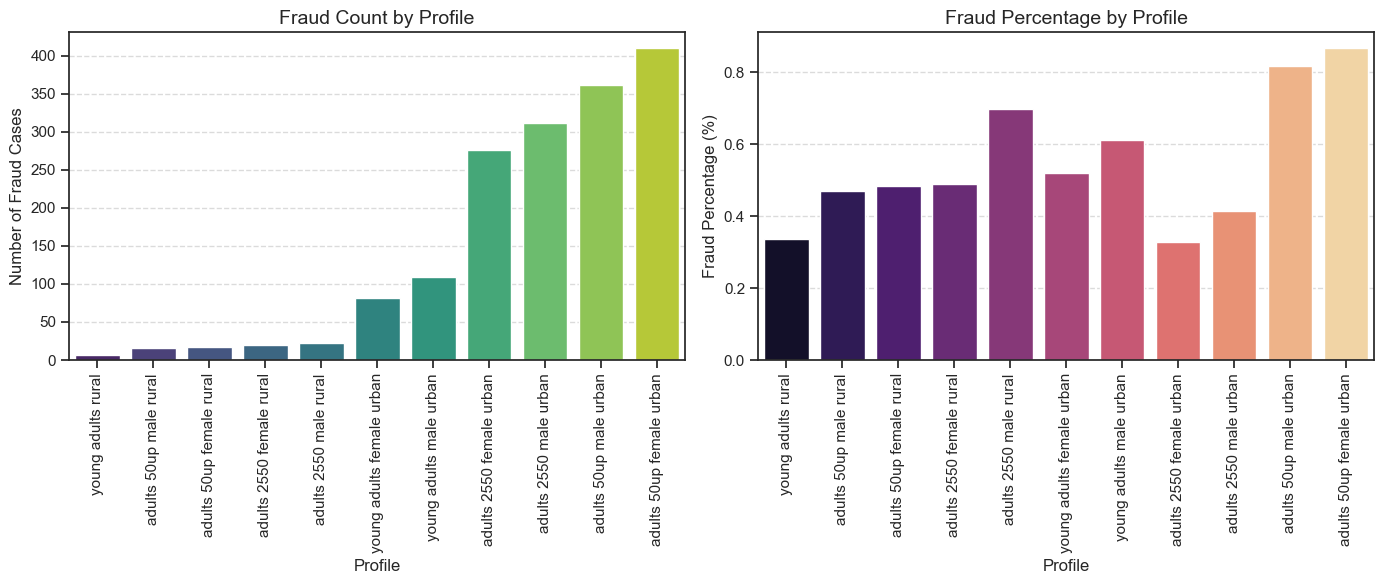

In [48]:
# Group by profile and sum the frauds (1 means fraud)
fraud_by_profile = df.groupby('profile')['is_fraud'].sum()

# Calculate the total number of transactions per profile
total_transactions_by_profile = df.groupby('profile').size()

# Calculate the percentage of fraud transactions for each profile
fraud_percentage_by_profile = (fraud_by_profile / total_transactions_by_profile) * 100

# Sort by the number of fraud cases in ascending order
fraud_by_profile = fraud_by_profile.sort_values(ascending=True)
fraud_percentage_by_profile = fraud_percentage_by_profile[fraud_by_profile.index]

# Set up the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Fraud count by profile
sns.barplot(x=fraud_by_profile.index, y=fraud_by_profile.values, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Profile', fontsize=12)
axes[0].set_ylabel('Number of Fraud Cases', fontsize=12)
axes[0].set_title('Fraud Count by Profile', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Fraud percentage by profile
sns.barplot(x=fraud_percentage_by_profile.index, y=fraud_percentage_by_profile.values, palette='magma', ax=axes[1])
axes[1].set_xlabel('Profile', fontsize=12)
axes[1].set_ylabel('Fraud Percentage (%)', fontsize=12)
axes[1].set_title('Fraud Percentage by Profile', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


##### <font color='blue'> plot card fraud distribution by category

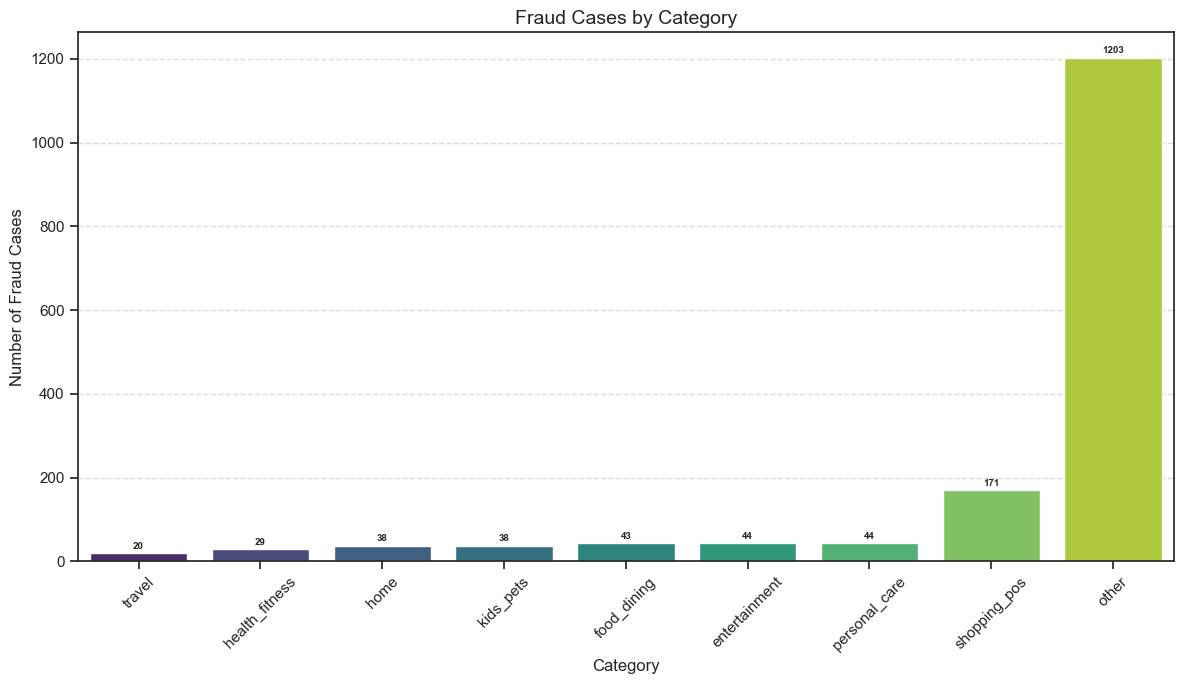

In [50]:
# Group fraud counts by category
fraud_by_category = df.groupby('category')['is_fraud'].sum().reset_index()

# Sort categories by fraud count
fraud_by_category = fraud_by_category.sort_values(by='is_fraud', ascending=True)

# Plot fraud cases by category
plt.figure(figsize=(12, 7))
sns.barplot(x='category', y='is_fraud', data=fraud_by_category, palette='viridis')

# Add fraud count values above each bar
for index, row in enumerate(fraud_by_category.itertuples()):
    plt.text(index, row.is_fraud + 10, f"{row.is_fraud}", ha='center', fontsize=7, fontweight='bold')

# Add labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.title('Fraud Cases by Category', fontsize=14)
plt.xticks(rotation=45)  # Rotates x labels slightly for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### <font color='Indigo'> Dummy Data 

In [52]:
cols_dummy= ['is_fraud', 'gender', 'is_weekend']
dum_df = df[cols_dummy]

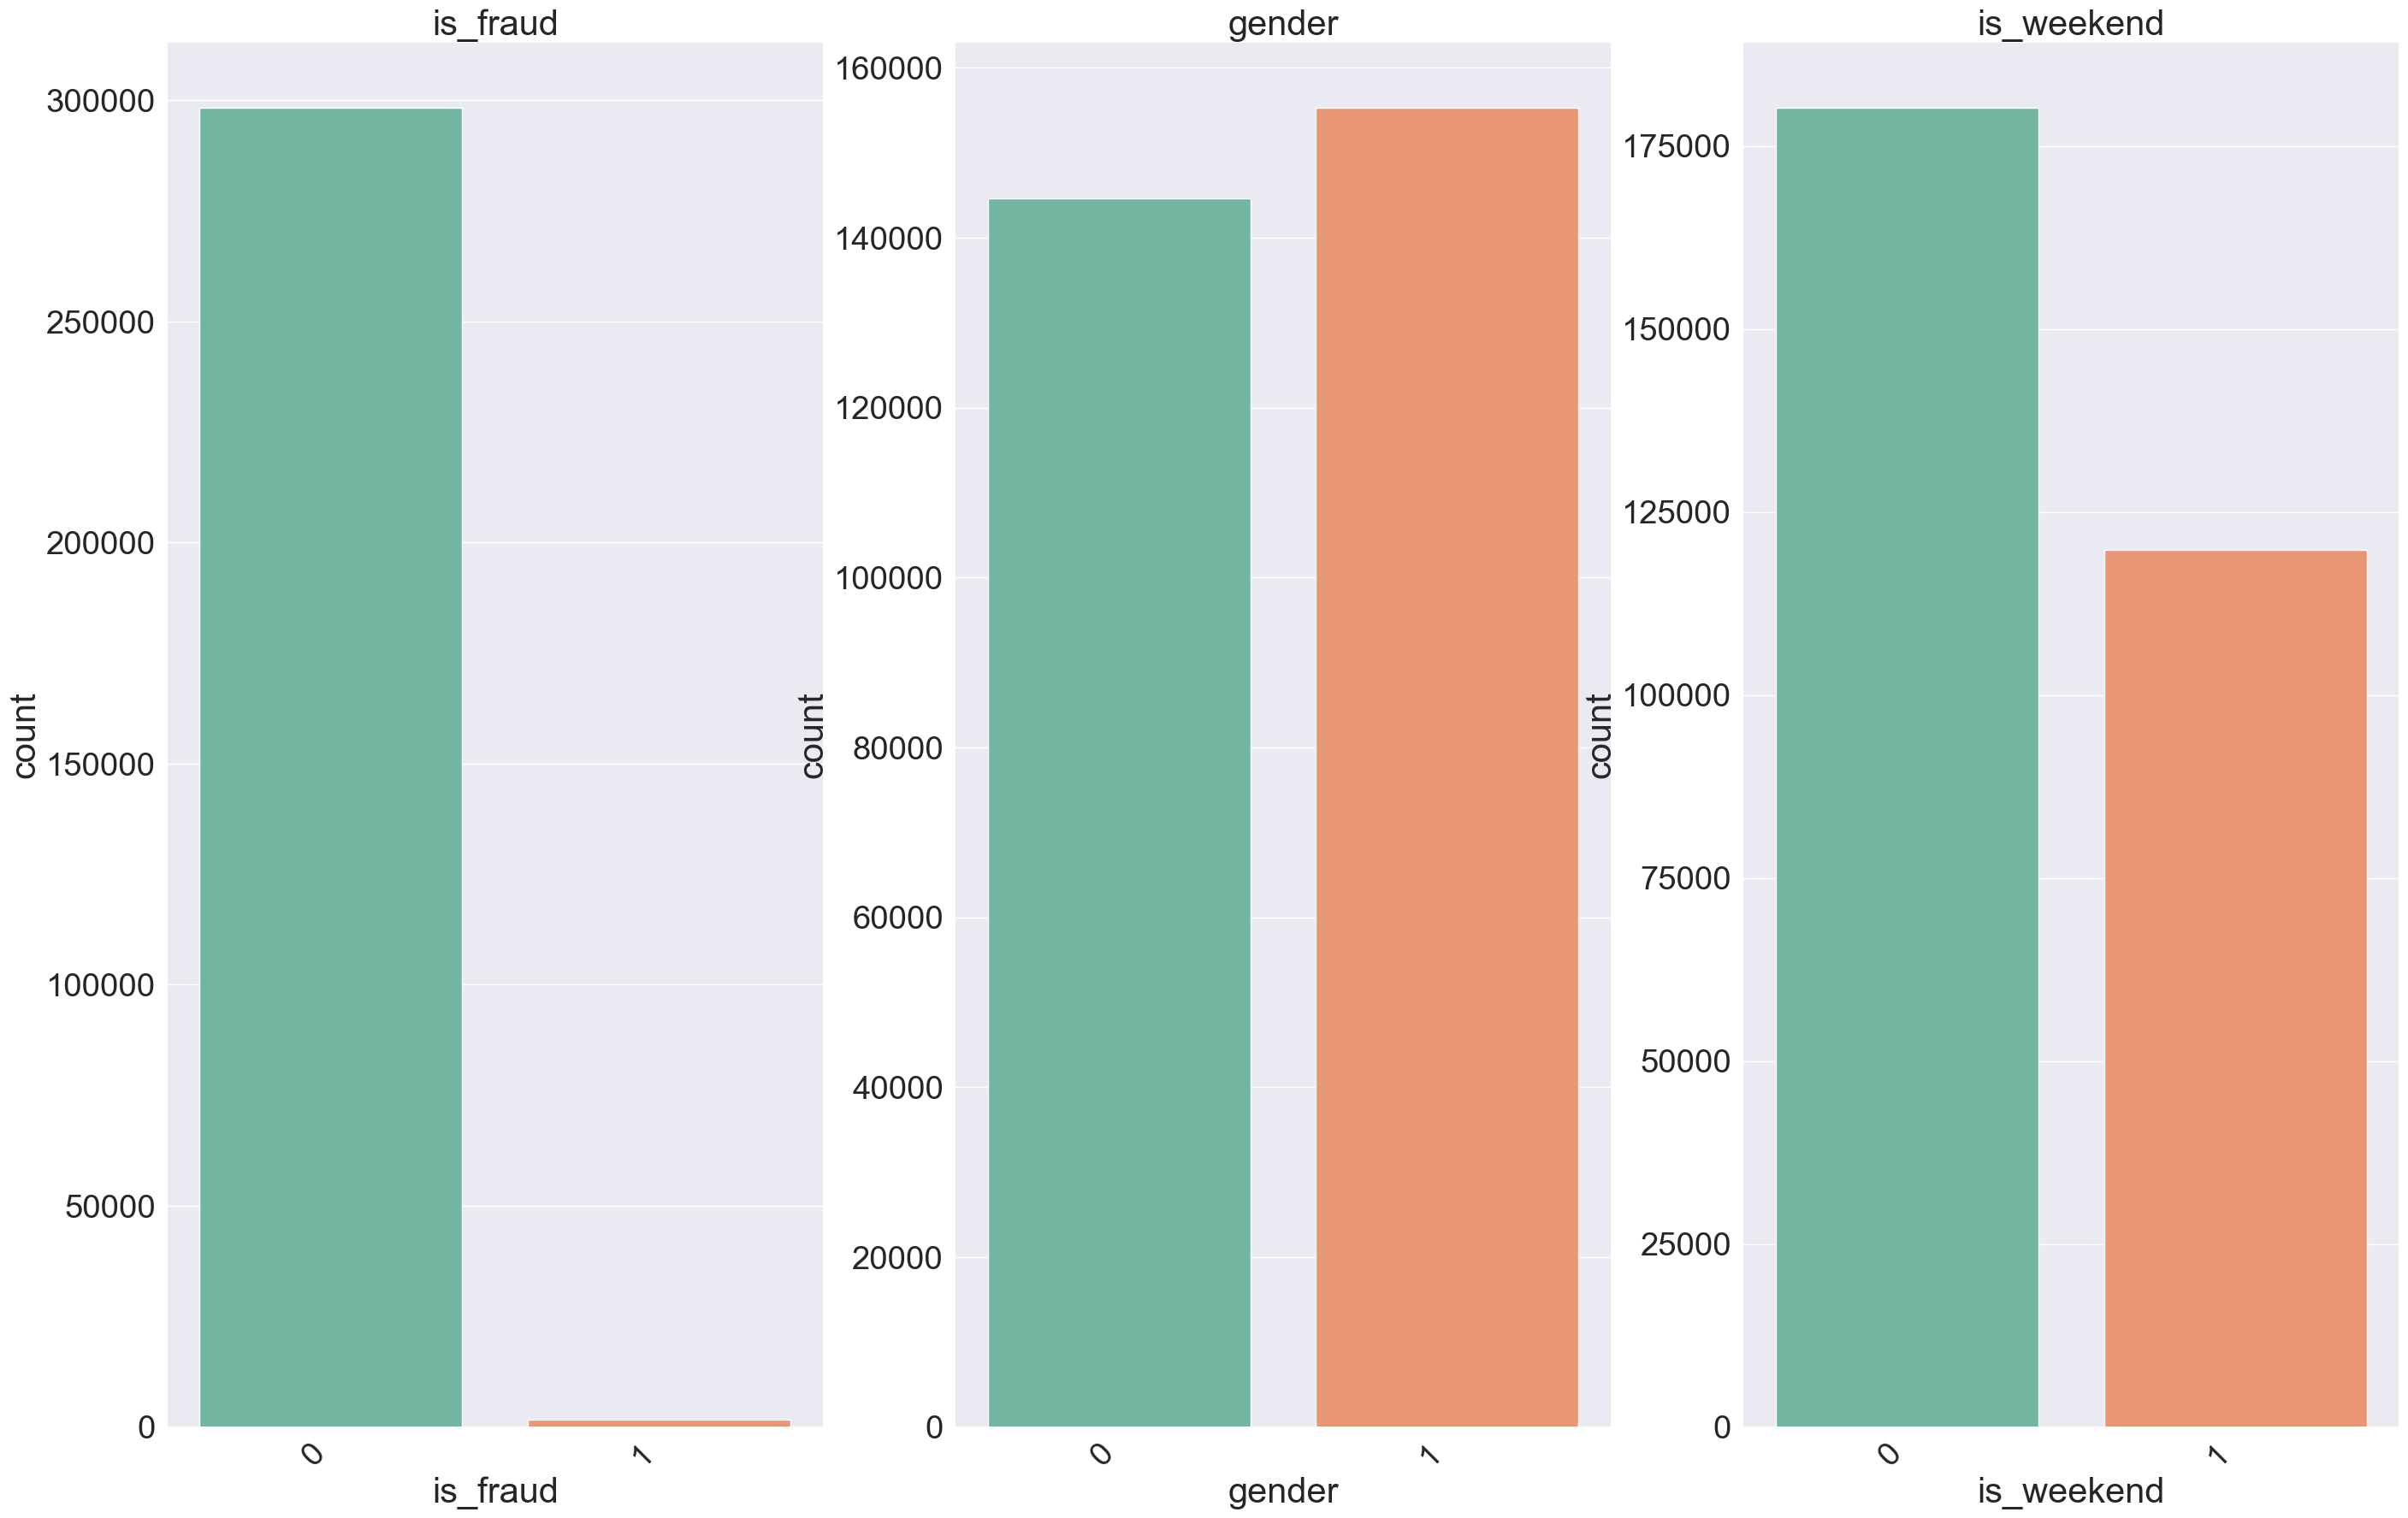

In [54]:
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=1.5)
sns.set(font_scale=2.5)

# Loop through each categorical column in your DataFrame
for i in dum_df.columns:
    plt.subplot(a, b, c)  # Set subplot position
    plt.title(f'{i}')
    plt.xlabel(i)
    
    # Add color palette to the countplot
    sns.countplot(data=dum_df, x=i, palette='Set2')  # Change 'Set2' to any palette you like
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")  # 45 degrees, adjust 'ha' (horizontal alignment) to 'right'

    c = c + 1  # Increment the counter for the next subplot

# Show the plot
plt.show()

#### <font color='Indigo'> Categorial Data 

In [99]:
categorical =['state', 'job', 'profile', 'category', 'distance_category', 'city_pop_range', 'age_range', 'trans_time','trans_time_group', 'trans_month', 'trans_day']
# Filter out the categorical columns'
categorical_df = df[categorical]

In [111]:
plot_categorical = lambda col: sns.countplot(x=col, data=categorical_df)

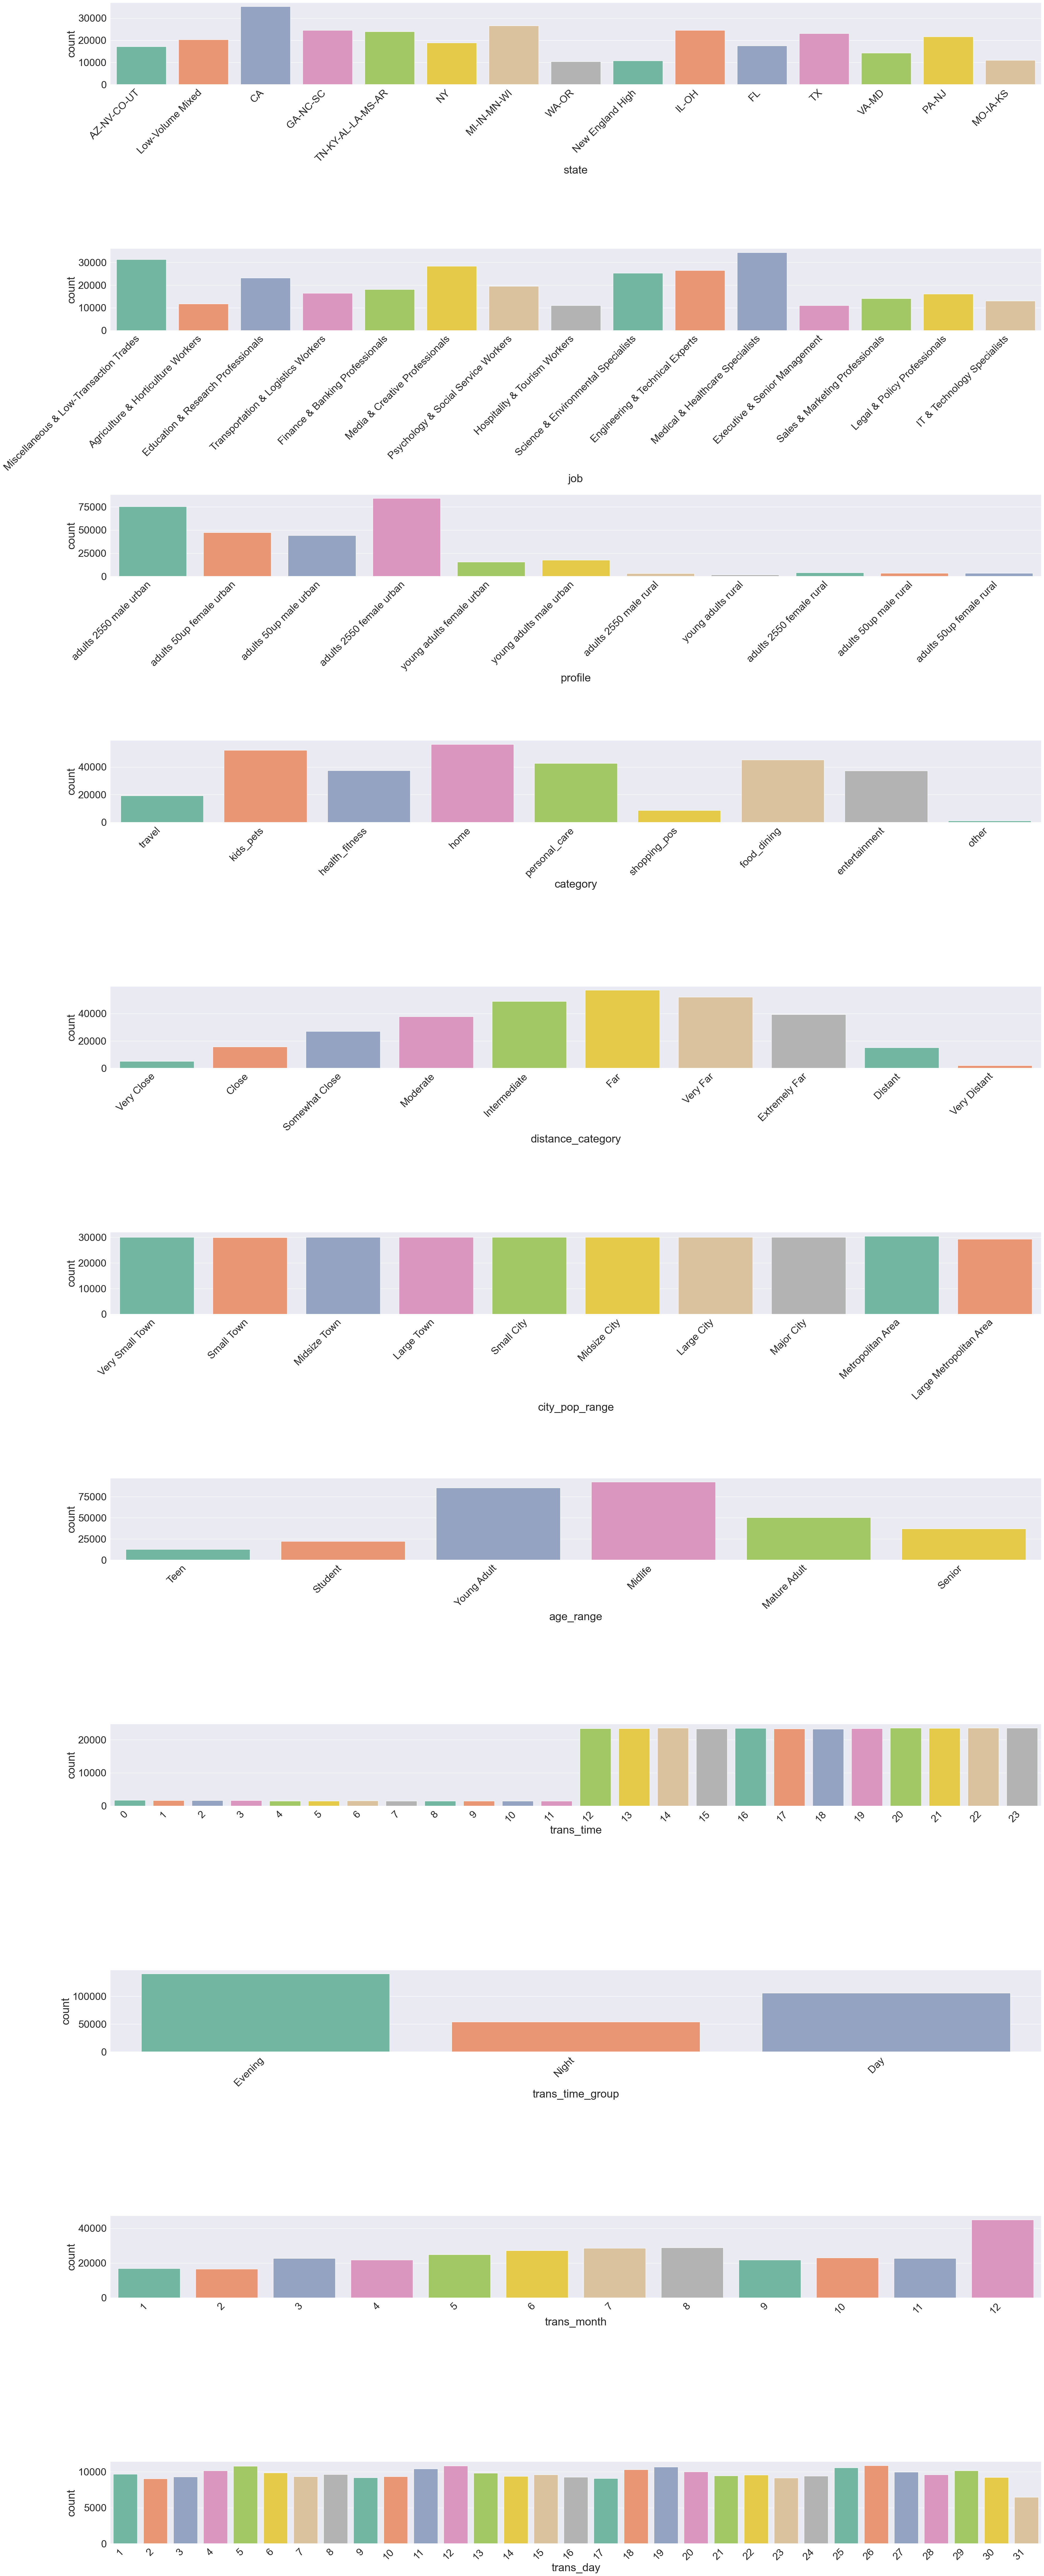

In [115]:
a = 13  # number of rows
b = 1  # number of columns
c = 1  # plot counter

# Create figure with specified size
fig = plt.figure(figsize=(40, 140))
plt.subplots_adjust(hspace=2)
sns.set(font_scale=2.5)

# Loop through each categorical column in your DataFrame
for i in categorical_df.columns:
    plt.subplot(a, b, c)  # Set subplot position
   # plt.title(f'{i}')
    #plt.xlabel(i)
    
    # Add color palette to the countplot
    sns.countplot(data=categorical_df, x=i, palette='Set2')  # Change 'Set2' to any palette you like
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")  # 45 degrees, adjust 'ha' (horizontal alignment) to 'right'

    c = c + 1  # Increment the counter for the next subplot

# Show the plot
plt.show()

#### <font color='Indigo'> Histograms for continues numbers 

In [117]:
numerical = ['ssn', 'cc_num', 'zip', 'city_pop', 'acct_num',  'amt', 'distance_km', 'age']
df_num = df[numerical]
df_num.shape

(300000, 8)

In [119]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ssn          300000 non-null  int32  
 1   cc_num       300000 non-null  int64  
 2   zip          300000 non-null  int64  
 3   city_pop     300000 non-null  int64  
 4   acct_num     300000 non-null  int64  
 5   amt          300000 non-null  float64
 6   distance_km  300000 non-null  int64  
 7   age          300000 non-null  int32  
dtypes: float64(1), int32(2), int64(5)
memory usage: 16.0 MB


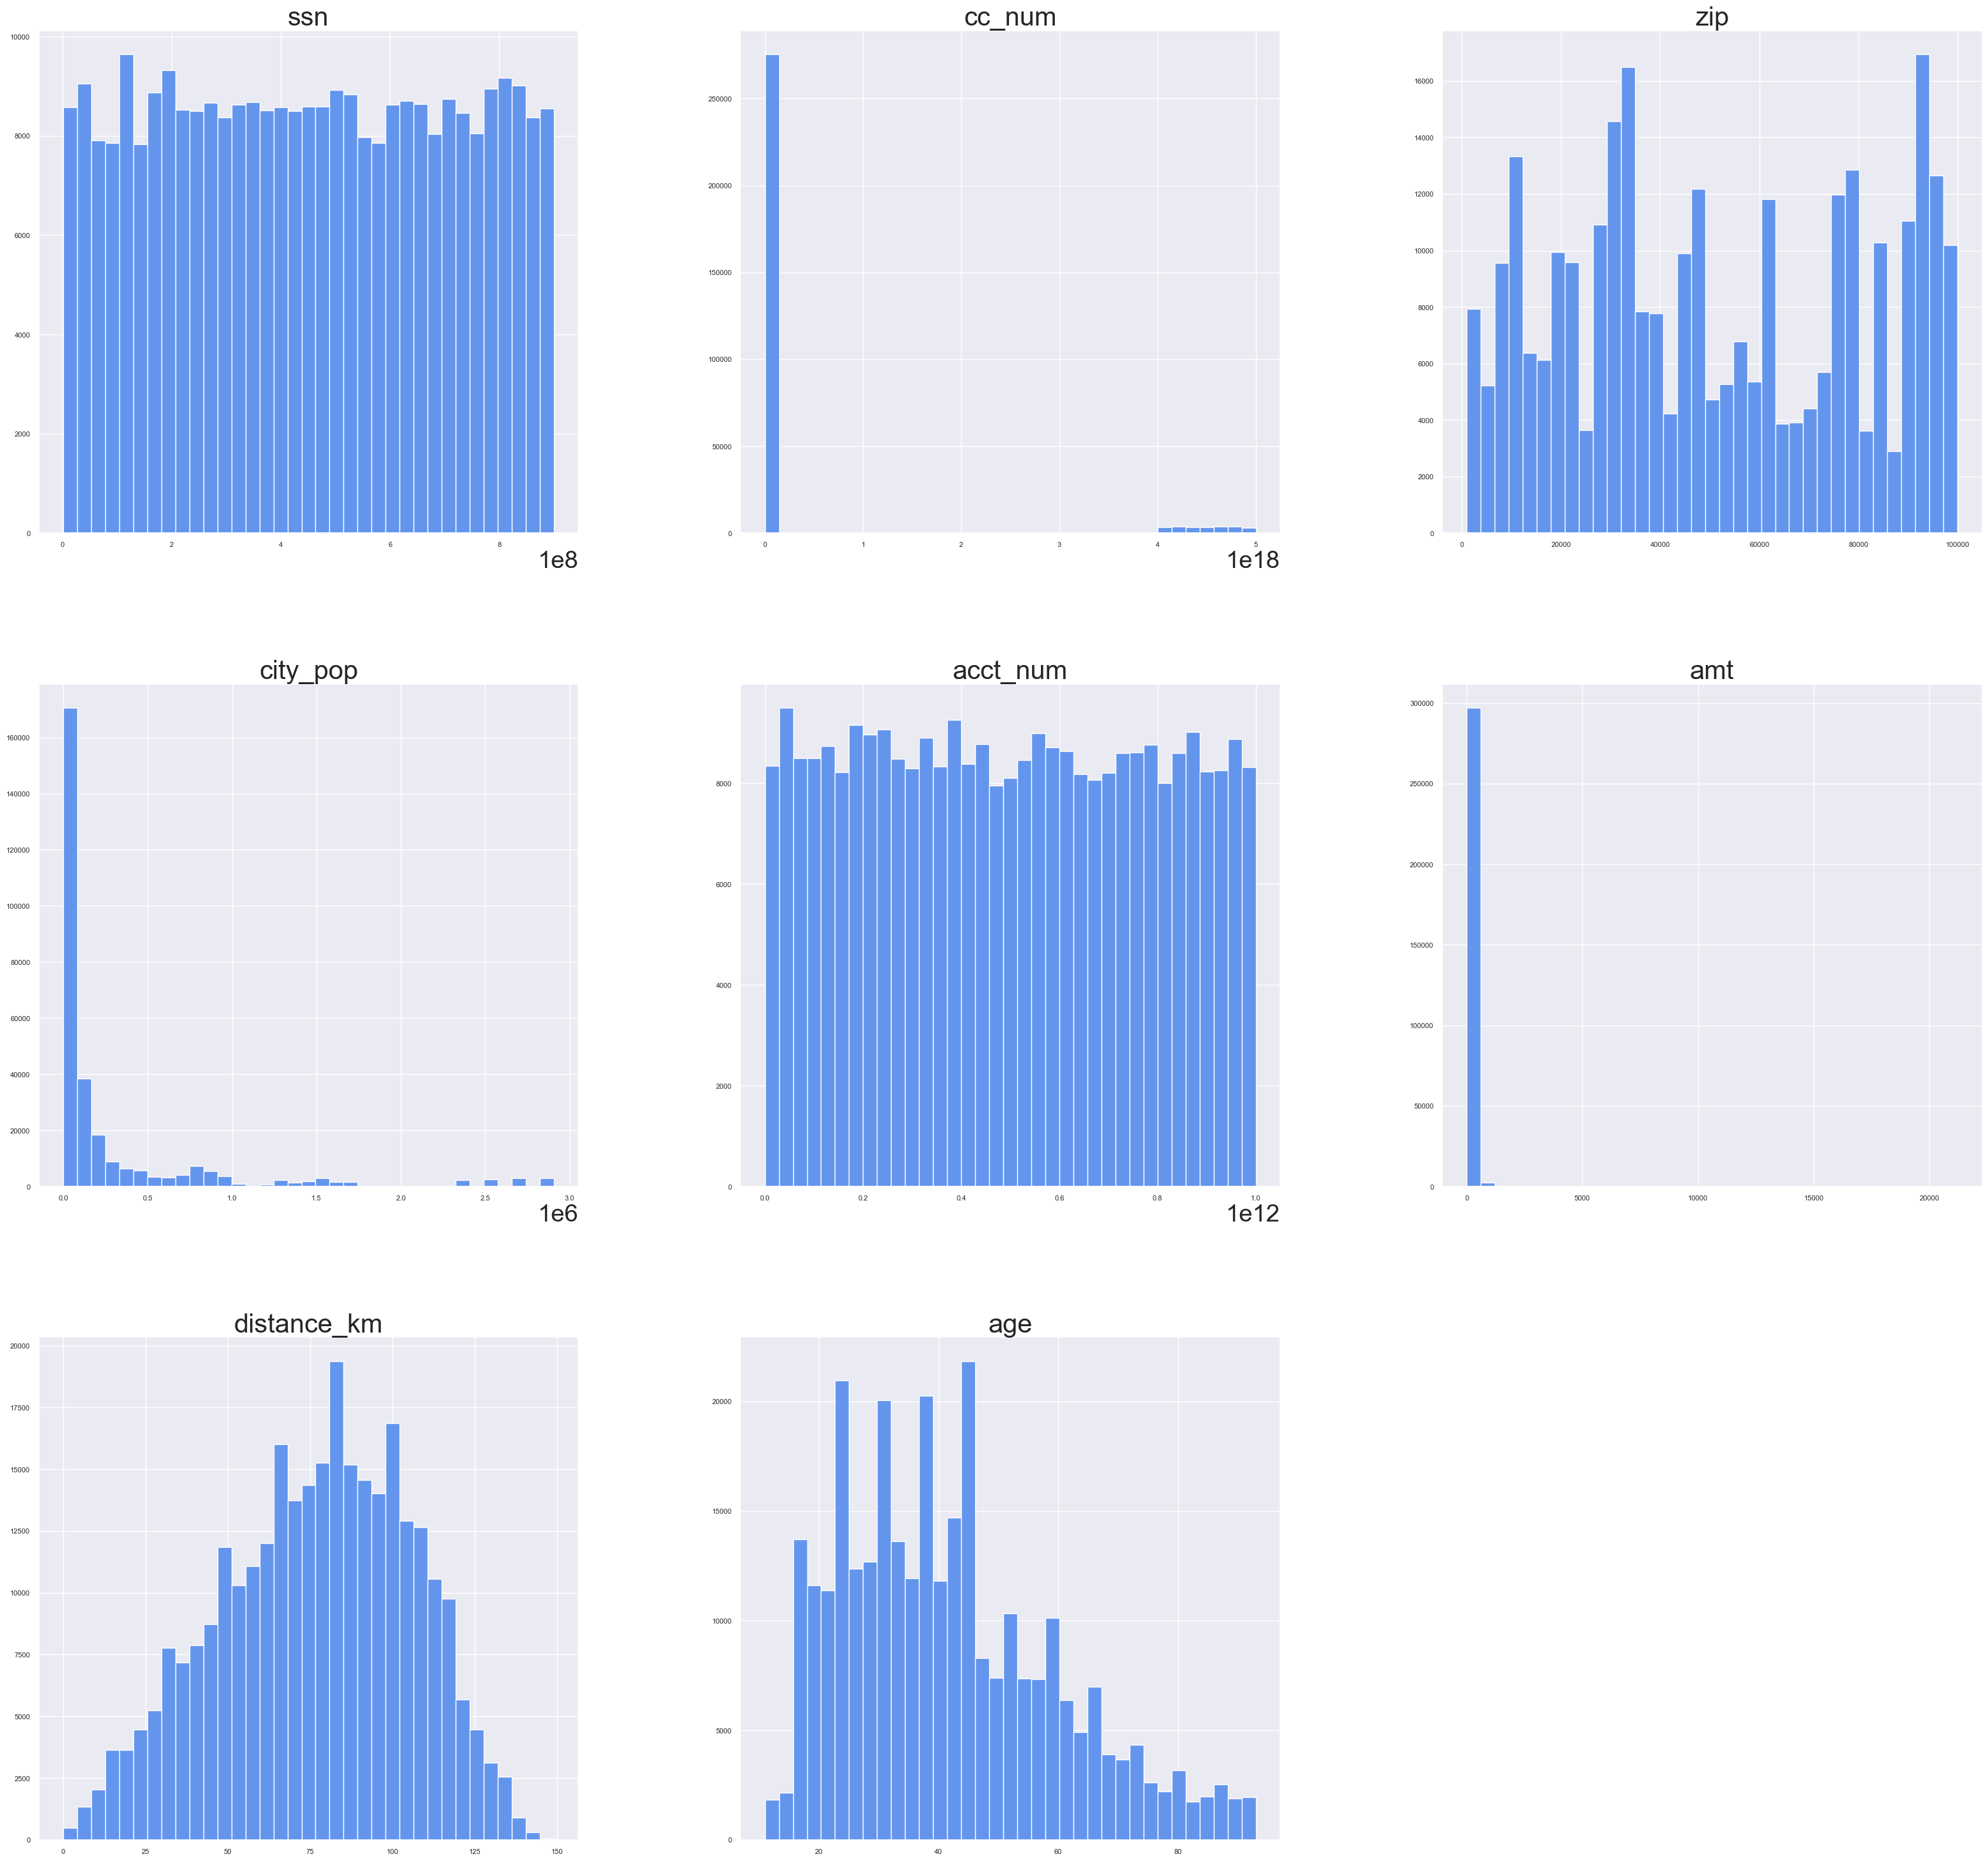

In [121]:
df_num.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "cornflowerblue");

#### <font color='Indigo'> Skewness

In [70]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

#### <font color='Indigo'> Correlation

In [72]:
# Identify object (categorical) columns
categorical_cols =['is_fraud', 'gender', 'state', 'job', 'profile', 'category', 'distance_category', 'city_pop_range', 'age_range', 'is_weekend', 'trans_time_group']

# Initialize LabelEncoder
le = LabelEncoder()

df_corr = df.copy()
# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_corr[col] = le.fit_transform(df_corr[col])

# remove string columns
df_corr = df_corr.drop(columns=['city', 'merchant', 'trans_num'])

In [76]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ssn                300000 non-null  int32  
 1   cc_num             300000 non-null  int64  
 2   gender             300000 non-null  int64  
 3   state              300000 non-null  int32  
 4   zip                300000 non-null  int64  
 5   city_pop           300000 non-null  int64  
 6   job                300000 non-null  int32  
 7   acct_num           300000 non-null  int64  
 8   profile            300000 non-null  int32  
 9   trans_time         300000 non-null  int32  
 10  category           300000 non-null  int32  
 11  amt                300000 non-null  float64
 12  is_fraud           300000 non-null  int64  
 13  distance_km        300000 non-null  int64  
 14  distance_category  300000 non-null  int32  
 15  city_pop_range     300000 non-null  int32  
 16  ag

In [78]:
df_corr.corr(method='spearman')

ssn     cc_num    gender     state      zip    city_pop  \
ssn                1.000000 -0.009782  0.008427 -0.010362  0.006378  0.004752   
cc_num            -0.009782  1.000000 -0.005724  0.011305 -0.006786  0.011971   
gender             0.008427 -0.005724  1.000000  0.012598  0.000661  0.003809   
state             -0.010362  0.011305  0.012598  1.000000 -0.284971 -0.131605   
zip                0.006378 -0.006786  0.000661 -0.284971  1.000000  0.170344   
city_pop           0.004752  0.011971  0.003809 -0.131605  0.170344  1.000000   
job               -0.009635  0.006564 -0.007803  0.001985 -0.002472  0.004957   
acct_num           0.006233  0.009544 -0.004108  0.002941  0.001676  0.004929   
profile           -0.004371  0.017007 -0.407731 -0.009338  0.000499  0.018617   
trans_time         0.000821 -0.000738  0.000679  0.000503  0.002235 -0.011239   
category          -0.001470 -0.001450  0.019661  0.000080 -0.000907  0.001271   
amt               -0.001227 -0.005331  0.092050  0.000289  0.000054 -0.009422   
is_fraud           0.000406 -0.003020 -0.003081  0.000624  0.000089  0.000722   
distance_km        0.000241 -0.002509 -0.001148 -0.017591  0.010911  0.013128   
distance_category  0.001446  0.000494  0.001155  0.002186  0.001447 -0.001577   
city_pop_range     0.000644 -0.008613 -0.001975  0.096805 -0.136058 -0.739941   
age               -0.000102 -0.000363  0.016008 -0.012303  0.001984 -0.012152   
age_range         -0.006453 -0.003899  0.023421  0.013844 -0.016987  0.007645   
trans_month       -0.001586 -0.001969  0.000510  0.000356 -0.002303  0.000572   
trans_day         -0.000046 -0.002593  0.001393 -0.001330 -0.002222  0.002085   
is_weekend         0.001069 -0.000257  0.006833 -0.001129  0.000457 -0.000090   
trans_time_group   0.000433 -0.001502 -0.000481 -0.001399  0.001584 -0.000082   

                      job    acct_num   profile  trans_time  category  \
ssn               -0.009635  0.006233 -0.004371   0.000821  -0.001470   
cc_num             0.006564  0.009544  0.017007  -0.000738  -0.001450   
gender            -0.007803 -0.004108 -0.407731   0.000679   0.019661   
state              0.001985  0.002941 -0.009338   0.000503   0.000080   
zip               -0.002472  0.001676  0.000499   0.002235  -0.000907   
city_pop           0.004957  0.004929  0.018617  -0.011239   0.001271   
job                1.000000 -0.002275 -0.000675  -0.000793  -0.000165   
acct_num          -0.002275  1.000000  0.006888   0.003648  -0.000546   
profile           -0.000675  0.006888  1.000000  -0.087043   0.020185   
trans_time        -0.000793  0.003648 -0.087043   1.000000   0.129133   
category          -0.000165 -0.000546  0.020185   0.129133   1.000000   
amt               -0.000455 -0.001080 -0.067666  -0.010708   0.014976   
is_fraud          -0.000478 -0.002098  0.021102  -0.002526   0.060604   
distance_km        0.001806 -0.003234  0.001780   0.001817   0.002617   
distance_category -0.003063  0.001777 -0.000505  -0.000383  -0.000574   
city_pop_range    -0.001682  0.006072 -0.019032   0.010057   0.000732   
age                0.005818 -0.001019  0.175486  -0.121528   0.056231   
age_range          0.011990 -0.006784 -0.250036   0.084762  -0.033545   
trans_month       -0.001329  0.000790 -0.002632   0.143037   0.825256   
trans_day          0.001975  0.000551 -0.000544   0.007385   0.061855   
is_weekend         0.001225  0.001348  0.029004   0.001110  -0.011984   
trans_time_group  -0.001292  0.001823 -0.015896   0.804073   0.024882   

                      amt    is_fraud  distance_km  distance_category  \
ssn               -0.001227  0.000406   0.000241        0.001446        
cc_num            -0.005331 -0.003020  -0.002509        0.000494        
gender             0.092050 -0.003081  -0.001148        0.001155        
state              0.000289  0.000624  -0.017591        0.002186        
zip                0.000054  0.000089   0.010911        0.001447        
city_pop          -0.009422  0.000722   

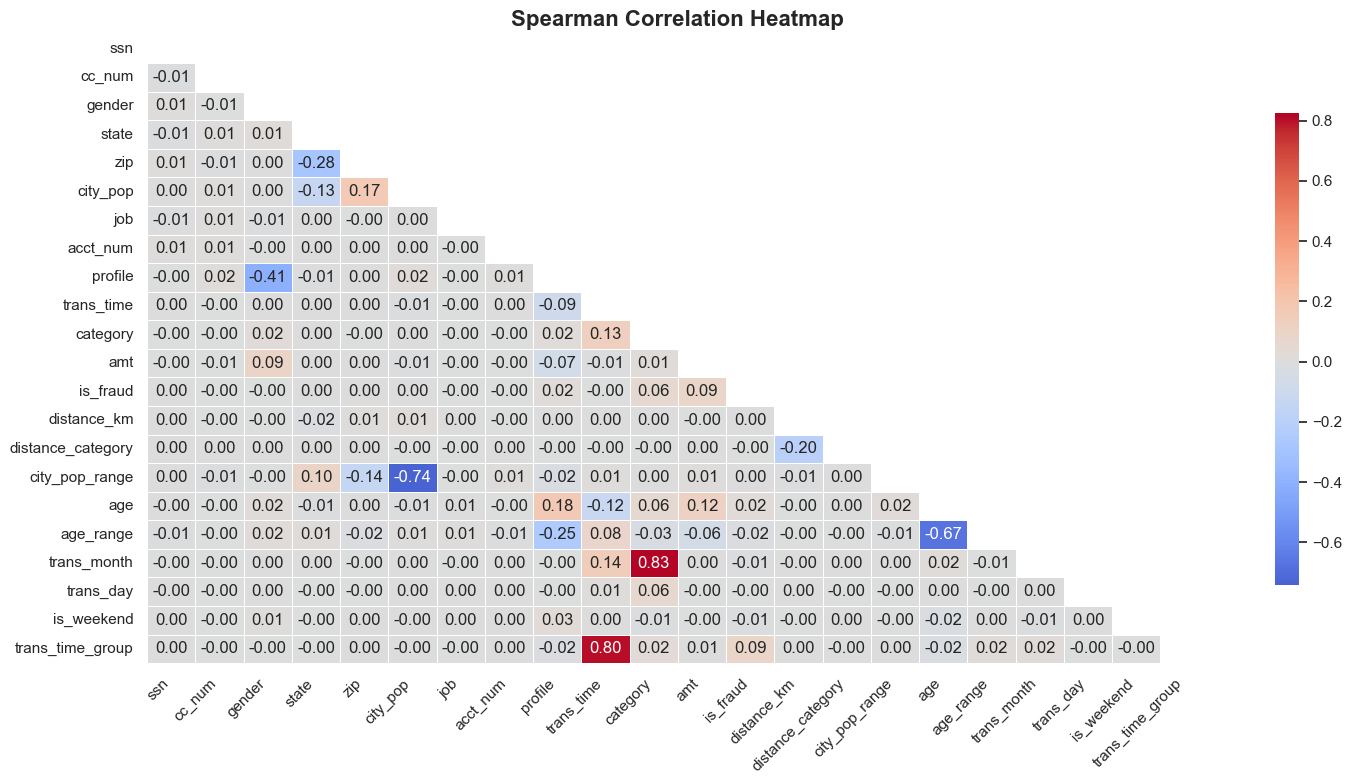

In [79]:
# Compute Spearman correlation
spearman_corr = df_corr.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# Create the heatmap
sns.heatmap(
    spearman_corr,
    mask=mask,
    annot=True,           # Show correlation coefficients
    fmt=".2f",            # 2 decimal places
    cmap='coolwarm',      # Choose colormap
    center=0,             # Center the colormap
    linewidths=0.5,       # Lines between boxes
    linecolor='white',    # Line color between boxes
    cbar_kws={"shrink": 0.75}
)

plt.title('Spearman Correlation Heatmap', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 🔍 Spearman Correlation Analysis for Credit Card Fraud Detection

In this section, I analyzed the Spearman correlation heatmap to explore the monotonic relationships between features in the credit card fraud dataset. I chose Spearman correlation because it captures both linear and non-linear relationships, which is essential for detecting fraud patterns that might not follow a straight-line trend. The heatmap shows correlation coefficients ranging from -0.8 to 0.8, with red representing strong positive correlations, blue indicating strong negative correlations, and white or light gray showing near-zero correlations. The dataset includes features like `ssn`, `cc_num`, `gender`, `state`, `zip`, `city_pop`, `job`, `acct_num`, `profile`, `trans_time`, `category`, `amt`, `is_fraud`, `trans_month`, `distance_km`, `distance_category`, `city_pop_range`, `age`, `age_range`, `trans_day`, `is_weekend`, and `trans_time_group`.

### Key Insights

#### Key Correlations with `is_fraud`
The primary interest is how variables correlate with `is_fraud`. Below are the variables with the highest absolute Spearman correlations with `is_fraud`:

- **`amt` (0.091018)**: A positive correlation suggests that higher transaction amounts are slightly more likely to be fraudulent.
- **`trans_time_group` (0.090980)**: A positive correlation indicates that certain time groups (e.g., specific times of day) are associated with increased fraud likelihood.
- **`category` (0.063801)**: A positive correlation implies that specific transaction categories may be more prone to fraud.
- **`profile` (0.023622)**: A smaller positive correlation suggests certain user profiles might be weakly linked to fraud.
- **`age` (0.019701)**: A weak positive correlation indicates a slight tendency for fraud to involve older individuals.
- **`age_range` (-0.017051)**: A weak negative correlation, possibly reflecting the categorical nature of age ranges.
- **`trans_month` (-0.015159)**: A weak negative correlation suggests fraud might be slightly less common in certain months.
- **`is_weekend` (-0.012739)**: A weak negative correlation indicates fraud may be slightly less likely on weekends.

Other variables (e.g., `ssn`, `cc_num`, `gender`, `state`, `zip`, `city_pop`, `job`, `acct_num`, `trans_time`, `distance_km`, `distance_category`, `city_pop_range`, `trans_day`) show very small correlations with `is_fraud` (absolute values < 0.01), suggesting minimal direct monotonic relationships with fraud.

#### Interpretation of Key Findings
- **Transaction Amount (`amt`)**: The strongest correlation with `is_fraud` (0.091018) highlights that larger transactions are more likely to be fraudulent, though the relationship is still weak.
- **Transaction Time (`trans_time_group`)**: With a correlation of 0.090980, certain times of day may be riskier for fraud, possibly reflecting patterns in fraudulent behavior.
- **Category (`category`)**: A correlation of 0.063801 suggests that fraud risk varies by transaction type (e.g., online purchases vs. in-store).
- **Weak Correlations**: Most variables have near-zero correlations with `is_fraud`, indicating they may not be strong individual predictors of fraud but could contribute in combination within a model.

#### Notable Correlations Among Features
Some variables exhibit strong correlations with each other, which may reflect derived features or natural relationships:
- **`trans_time` and `trans_time_group` (0.806960)**: High positive correlation, expected since `trans_time_group` is derived from `trans_time`.
- **`age` and `age_range` (-0.671208)**: Strong negative correlation, expected since `age_range` is a categorical version of `age`.
- **`city_pop` and `city_pop_range` (-0.740161)**: Strong negative correlation, expected since `city_pop_range` is derived from `city_pop`.
- **`category` and `trans_month` (0.822845)**: Very strong positive correlation, indicating that certain transaction categories are more common in specific months (e.g., seasonal trends).
- **`profile` and `gender` (-0.402807)**: Moderate negative correlation, suggesting profiles may be tied to gender.
- **`state` and `zip` (-0.281483)**: Moderate negative correlation, expected since zip codes are geographically tied to states.
- **`zip` and `city_pop` (0.170425)**: Positive correlation, as population size varies by zip code.

Other notable relationships:
- **`amt` and `age` (0.117721)**: Older individuals tend to make larger transactions.
- **`trans_time` and `age` (-0.117631)**: Different age groups may transact at different times.
- **`category` and `trans_time` (0.131062)**: Certain categories may occur more at specific times.

#### Implications for Fraud Detection
1. **Key Features**: `amt`, `trans_time_group`, and `category` show the strongest (though still weak) correlations with `is_fraud`, making them potential candidates for feature selection or engineering in a fraud detection model.
2. **Feature Interactions**: Strong correlations between features (e.g., `trans_time` and `trans_time_group`, `category` and `trans_month`) suggest opportunities to explore interactions or derived features.
3. **Limitations**: Many variables have negligible correlations with `is_fraud`, indicating they may not be strong standalone predictors. However, they could still contribute in a multivariate model.
4. **Beyond Spearman**: Spearman correlation captures only monotonic relationships. Non-monotonic relationships or complex patterns might be missed, suggesting the use of additional techniques (e.g., mutual information, feature importance from models).

#### Conclusion
This analysis highlights that transaction amount, time group, and category have the most notable monotonic relationships with fraud, though all correlations remain relatively weak (< 0.1). These insights provide a starting point for feature selection and model development in fraud detection, with further exploration needed to capture non-linear or interactive effects.

This Spearman correlation analysis has given me a clear picture of how the features relate, helping me decide which ones to prioritize, tweak, or drop as I build my credit card fraud detection model.

 #### <font color='Indigo'>t-test

T-statistic: -0.25183075533652416
P-value: 0.8011720564399162


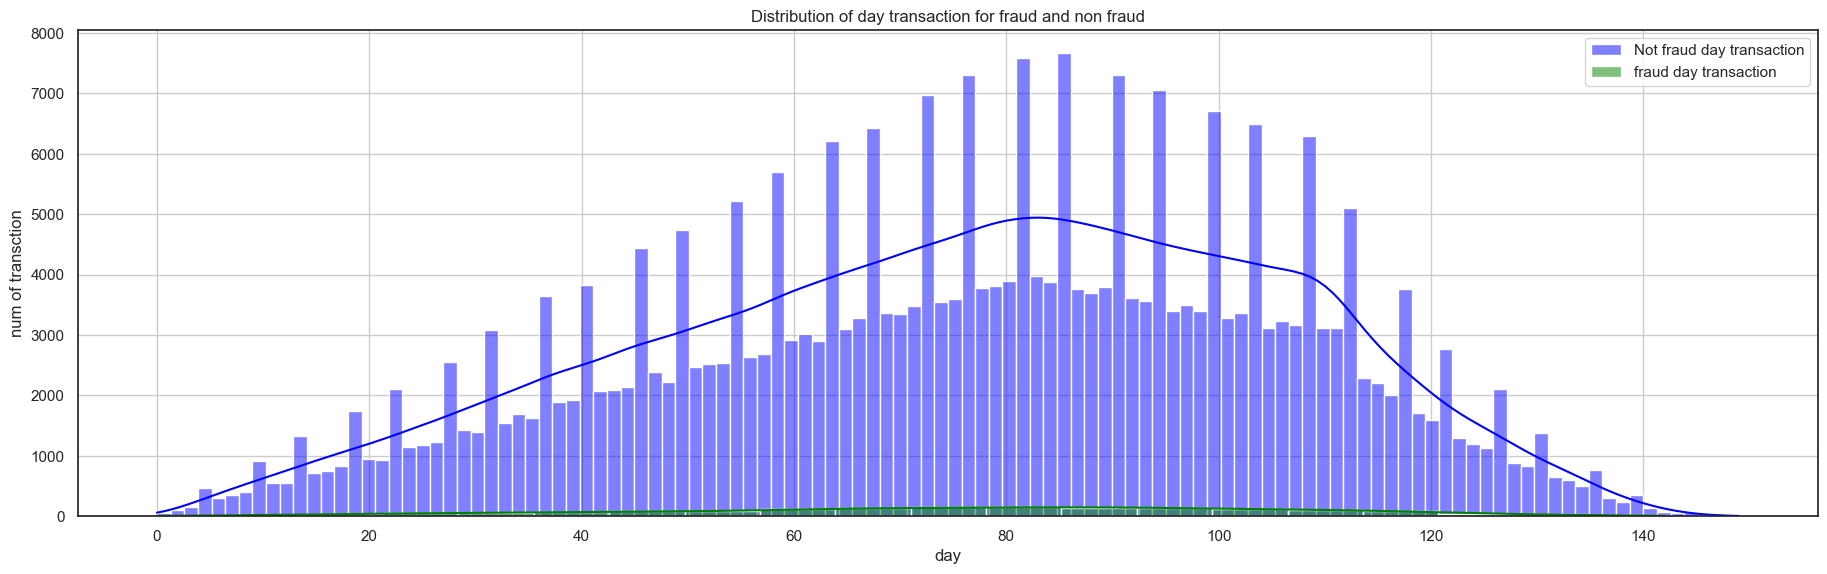

In [83]:
#Separate the consumption data by weekends and weekdays
Notfraud_day_trans = df[df['is_fraud'] == 0]['distance_km']
fraud_day_trans = df[df['is_fraud'] == 1]['distance_km']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(Notfraud_day_trans, fraud_day_trans)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution of water consumption for weekends and weekdays
plt.figure(figsize=(20, 6))
sns.histplot(Notfraud_day_trans, kde=True, color='blue', label='Not fraud day transaction', alpha=0.5)
sns.histplot(fraud_day_trans, kde=True, color='green', label='fraud day transaction', alpha=0.5)
plt.title('Distribution of day transaction for fraud and non fraud')
plt.xlabel('day')
plt.ylabel('num of transction')
plt.legend()
plt.grid(True)
plt.show()

 #### <font color='Indigo'>Chis-quare

In [85]:
# Convert all columns of the DataFrame to categorical
categorical_df = categorical_df.apply(lambda x: x.astype('category'))
categorical_df.nunique()

state                15
job                  15
profile              11
category              9
distance_category    10
city_pop_range       10
age_range             6
trans_time_group      3
dtype: int64

In [89]:
import itertools

# List to hold results for each pair of variables
results = []

# Iterate over all unique pairs of columns
for col1, col2 in itertools.combinations(categorical_df.columns, 2):
    # Create the contingency table for the pair
    contingency_table = pd.crosstab(categorical_df[col1], categorical_df[col2])
    
    # Skip if the contingency table doesn't have enough dimensions for testing
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        continue
    
    try:
        # Perform the Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Append the results to the list
        results.append({
            "Variable 1": col1,
            "Variable 2": col2,
            "Chi-Square Statistic": chi2_stat,
            "P-Value": f"{p_value:.4f}",
            "Degrees of Freedom": dof
        })
    except Exception as e:
        # In case of an error, record it for that variable pair
        results.append({
            "Variable 1": col1,
            "Variable 2": col2,
            "Chi-Square Statistic": None,
            "P-Value": None,
            "Degrees of Freedom": None,
            "Error": str(e)
        })

# Convert the results list into a DataFrame for a nice table display
results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)
# Display the table
results_df

Variable 1         Variable 2      Chi-Square Statistic P-Value  \
0               state                job        4653.980050     0.0000   
1               state            profile       12269.845234     0.0000   
2               state           category         124.420515     0.1990   
3               state  distance_category        2212.898149     0.0000   
4               state     city_pop_range       81806.713415     0.0000   
5               state          age_range        1825.305467     0.0000   
6               state   trans_time_group          16.409071     0.9594   
7                 job            profile        3288.429224     0.0000   
8                 job           category         111.507853     0.4954   
9                 job  distance_category         122.345207     0.5755   
10                job     city_pop_range        3063.232525     0.0000   
11                job          age_range        1513.293855     0.0000   
12                job   trans_time_group          41.656725     0.0467   
13            profile           category       13154.921778     0.0000   
14            profile  distance_category         111.668581     0.0606   
15            profile     city_pop_range      152532.046099     0.0000   
16            profile          age_range      541025.540173     0.0000   
17            profile   trans_time_group        2697.632343     0.0000   
18           category  distance_category          70.767054     0.5190   
19           category     city_pop_range         125.143320     0.0001   
20           category          age_range        9096.637313     0.0000   
21           category   trans_time_group        6806.961967     0.0000   
22  distance_category     city_pop_range         211.687564     0.0000   
23  distance_category          age_range          59.762614     0.0693   
24  distance_category   trans_time_group          16.861823     0.5326   
25     city_pop_range          age_range        1577.864593     0.0000   
26     city_pop_range   trans_time_group          60.643858     0.0000   
27          age_range   trans_time_group        2014.730521     0.0000   

    Degrees of Freedom  
0           196         
1           140         
2           112         
3           126         
4           126         
5            70         
6            28         
7           140         
8           112         
9           126         
10          126         
11           70         
12           28         
13           80         
14           90         
15           90         
16           50         
17           20         
18           72         
19           72         
20           40         
21           16         
22           81         
23           45         
24           18         
25           45         
26           18         
27           10

## Introduction

This report presents the results of a chi-square analysis conducted on a credit card transaction dataset. The aim is to identify statistically significant associations between the fraud indicator (`is_fraud`) and various demographic and transaction features. These insights can help in selecting the most informative variables for building predictive models for fraud detection.

## Methodology

For each pair of variables, a chi-square test of independence was performed. The key outputs of the test are:

- **Chi-Square Statistic:** Measures the divergence between observed and expected frequencies.
- **P-Value:** The probability of observing the data assuming the null hypothesis (no association) is true. A p-value below 0.05 typically indicates statistical significance.
- **Degrees of Freedom:** Reflects the number of independent comparisons made in the test.

## Results
## Variables Associated with Fraud

These variables show significant relationships with fraud (p < 0.05) and are critical for detection:

- **Category**: Very strong (χ² = 218,639.48, p = 0.0000)
- **Transaction Time Group**: Strong (χ² = 5,144.06, p = 0.0000)
- **Profile**: Strong (χ² = 281.06, p = 0.0000)
- **Age Range**: Moderate (χ² = 216.29, p = 0.0000)
- **Is Weekend**: Moderate (χ² = 48.33, p = 0.0000)
- **City Population Range**: Weak (χ² = 28.74, p = 0.0007)
- **Gender**: Weak (χ² = 4.70, p = 0.0302)

## Variables Not Associated with Fraud

These variables lack significant direct ties to fraud (p > 0.05) and can likely be de-emphasized:

- **Job**: (p = 0.2501)
- **State**: (p = 0.7619)
- **Distance Category**: (p = 0.3582)

## Other Key Relationships

Notable associations between non-fraud variables that may indirectly aid fraud detection:

- **Profile ↔ Age Range**: Extremely strong (χ² = 540,992.28, p = 0.0000)
- **Profile ↔ City Population Range**: Strong (χ² = 151,606.49, p = 0.0000)
- **Category ↔ Transaction Time Group**: Strong (χ² = 6,535.69, p = 0.0000)

## Recommendations for Fraud Detection

- **Focus On**: `category`, `trans_time_group`, `profile`, `age_range`, `is_weekend`, `city_pop_range`, `gender`.
- **Ignore (Unless Combined)**: `job`, `state`, `distance_category`.
- **Explore Interactions**: Combine `profile` with `age_range` or `city_pop_range`, and `category` with `trans_time_group` for deeper insights.


## Pickle file

In [93]:
df.to_pickle(r'C:\Course\Repo\Files\Fraud detection\df_model_data_after_EDA_12.3.25.pkl')

##### <font color='blue'> plot fraud by card_brnd

In [ ]:
# Group by card_brand and count the number of fraud transactions
fraud_counts = df[df['is_fraud'] == 1]['card_brand'].value_counts()

# Group by card_brand and count the total number of transactions (fraud + non-fraud) for each brand
total_counts = df['card_brand'].value_counts()

# Calculate the fraud percentage for each card brand (fraud transactions / total transactions for the brand) * 100
fraud_percentages = (fraud_counts / total_counts) * 100

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the number of fraud transactions
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Card Brand', fontsize=12)
axes[0].set_ylabel('Number of Fraud Transactions', fontsize=12)
axes[0].set_title('Number of Fraud Transactions by Card Brand', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars for the first plot
for index, value in enumerate(fraud_counts.values):
    axes[0].text(index, value + 10, f"{value:,}", ha='center', fontsize=10)

# Plot the fraud percentage for each card brand
sns.barplot(x=fraud_percentages.index, y=fraud_percentages.values, palette='magma', ax=axes[1])
axes[1].set_xlabel('Card Brand', fontsize=12)
axes[1].set_ylabel('Fraud Percentage (%)', fontsize=12)
axes[1].set_title('Fraud Percentage by Card Brand (Relative to All Transactions)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars for the second plot
for index, value in enumerate(fraud_percentages.values):
    axes[1].text(index, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
